<a href="https://colab.research.google.com/github/VeerVikramSingh/EDA-practice/blob/master/EDA_MCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)

In [89]:
!pip install plotly -- upgrade

ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [90]:
!pip install chart-studio

In [91]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

In [6]:
df_menu=pd.read_excel("https://github.com/insaid2018/Term-1/raw/master/Data/Casestudy/mcdonalds_menu.xlsx")
df_menu.head()

,Category,Item,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
0,Breakfast,Egg & Cheese Muﬃn,112,290,14,13.0,7.0,0.2,244,28,2,2,620
1,Breakfast,Sausage McMuﬀm,112,273,16,11.0,5.7,0.2,50,28,2,2,950
2,Breakfast,Sausage & Egg McMuﬀm,157,355,22,17.0,7.9,0.2,277,29,2,2,1020
3,Breakfast,Veg McMuﬀm,119,299,10,12.0,7.2,0.2,21,38,3,3,1000
4,Breakfast,Veg Supreme Muﬃn,139,299,7,13.0,5.2,0.2,11,39,4,4,960


In [7]:
df_menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 13 columns):
Category         340 non-null object
Item             340 non-null object
Serve_Size       340 non-null object
Energy           340 non-null int64
Protein          340 non-null int64
Total_Fat        340 non-null float64
Saturated_Fat    340 non-null float64
Trans_Fat        340 non-null float64
Cholestrol       340 non-null int64
Carbohydrates    340 non-null int64
Sugars           340 non-null int64
Dietary_Fibre    340 non-null int64
Sodium           340 non-null object
dtypes: float64(3), int64(6), object(4)
memory usage: 34.7+ KB


info function gives us the following insights into the df_menu dataframe:

There are a total of 340 samples (rows) and 13 columns in the dataframe.

There are 9 columns with a numeric datatype and 4 columns with an object datatype.

There are 0 missing values in the data.

In [8]:
df_store=pd.read_excel("https://github.com/insaid2018/Term-1/raw/master/Data/Casestudy/mcdonalds_outlets.xlsx")
df_store.head()

,Brand,Store ID,Store Name,Ownership Type,Street Address,City,State,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item
0,McDonald's,23149-228271,Banjara Hills,Joint Venture,"Lower Ground Floor, GVK One, Road Number 1, Banjara Hills",Hyderabad,AP,IN,500034,NaN,GMT+05:30 Asia/New_Delhi,78.45,17.42,2.117344,0.171584,1.655165,0.907433,0.747732,34.311197,3979.583117,Egg & Cheese Muﬃn
1,McDonald's,23191-228548,Kukatpally,Joint Venture,"Upper Ground Floor, Forum Sujana Mall, Kukatpally",Hyderabad,AP,IN,500072,NaN,GMT+05:30 Asia/New_Delhi,78.39,17.48,1.058504,0.054645,0.895944,0.453645,0.442299,25.487533,1156.010620,Sausage McMuﬀm
2,McDonald's,23193-228546,Madhapur,Joint Venture,"Lower Ground Floor, Inorbit Mall, Madhapur",Hyderabad,AP,IN,500081,NaN,GMT+05:30 Asia/New_Delhi,78.39,17.43,4.505020,0.663867,2.864311,1.930723,0.933588,54.208502,10346.720786,Sausage & Egg McMuﬀm
3,McDonald's,23180-228545,Jubilee Hills,Joint Venture,"Ground Floor, Road No. 92, Near Apollo hospital, Jubilee Hills",Hyderabad,AP,IN,500033,NaN,GMT+05:30 Asia/New_Delhi,78.42,17.42,3.405530,0.397835,2.394072,1.459513,0.934559,45.046083,7414.746544,Veg McMuﬀm
4,McDonald's,24457-238129,Hi-Tech City,Joint Venture,"Upper Ground Floor, Phoenix tower A, Opposite Trident Hotel, Madhapur Village",Hyderabad,AP,IN,500084,NaN,GMT+05:30 Asia/New_Delhi,78.38,17.45,7.332713,1.656524,3.395053,3.142591,0.252461,77.772607,17887.234107,Veg Supreme Muﬃn


In [9]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 21 columns):
Brand                  340 non-null object
Store ID               340 non-null object
Store Name             340 non-null object
Ownership Type         340 non-null object
Street Address         340 non-null object
City                   340 non-null object
State                  340 non-null object
Country                340 non-null object
Postcode               340 non-null int64
Phone Number           248 non-null object
Timezone               340 non-null object
Longitude              340 non-null float64
Latitude               340 non-null float64
Revenue                340 non-null float64
Profits                340 non-null float64
Selling Price          340 non-null float64
Cost Price             340 non-null float64
Gross Profit Margin    340 non-null float64
Number of Employees    340 non-null float64
Customers              340 non-null float64
Best Selling Item      340 

info function gives us the following insights into the df_store dataframe:

There are a total of 340 samples (rows) and 21 columns in the dataframe.

There are 10 columns with a numeric datatype and 11 columns with an object datatype.

There are missing values in the Phone Number column.

We are going to perform a merge on the two dataframes, df_store and df_menu on the basis of Best Selling Item of df_store dataframe and Item column of df_menu dataframe to create a new dataframe df_merge, in order to make our EDA easier.

In [10]:
df_merge=pd.merge(df_store,df_menu,how="inner",left_on="Best Selling Item",right_on="Item")
df_merge.head()

,Brand,Store ID,Store Name,Ownership Type,Street Address,City,State,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Item,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
0,McDonald's,23149-228271,Banjara Hills,Joint Venture,"Lower Ground Floor, GVK One, Road Number 1, Banjara Hills",Hyderabad,AP,IN,500034,NaN,GMT+05:30 Asia/New_Delhi,78.45,17.42,2.117344,0.171584,1.655165,0.907433,0.747732,34.311197,3979.583117,Egg & Cheese Muﬃn,Breakfast,Egg & Cheese Muﬃn,112,290,14,13.0,7.0,0.2,244,28,2,2,620
1,McDonald's,23191-228548,Kukatpally,Joint Venture,"Upper Ground Floor, Forum Sujana Mall, Kukatpally",Hyderabad,AP,IN,500072,NaN,GMT+05:30 Asia/New_Delhi,78.39,17.48,1.058504,0.054645,0.895944,0.453645,0.442299,25.487533,1156.010620,Sausage McMuﬀm,Breakfast,Sausage McMuﬀm,112,273,16,11.0,5.7,0.2,50,28,2,2,950
2,McDonald's,23193-228546,Madhapur,Joint Venture,"Lower Ground Floor, Inorbit Mall, Madhapur",Hyderabad,AP,IN,500081,NaN,GMT+05:30 Asia/New_Delhi,78.39,17.43,4.505020,0.663867,2.864311,1.930723,0.933588,54.208502,10346.720786,Sausage & Egg McMuﬀm,Breakfast,Sausage & Egg McMuﬀm,157,355,22,17.0,7.9,0.2,277,29,2,2,1020
3,McDonald's,23180-228545,Jubilee Hills,Joint Venture,"Ground Floor, Road No. 92, Near Apollo hospital, Jubilee Hills",Hyderabad,AP,IN,500033,NaN,GMT+05:30 Asia/New_Delhi,78.42,17.42,3.405530,0.397835,2.394072,1.459513,0.934559,45.046083,7414.746544,Veg McMuﬀm,Breakfast,Veg McMuﬀm,119,299,10,12.0,7.2,0.2,21,38,3,3,1000
4,McDonald's,24457-238129,Hi-Tech City,Joint Venture,"Upper Ground Floor, Phoenix tower A, Opposite Trident Hotel, Madhapur Village",Hyderabad,AP,IN,500084,NaN,GMT+05:30 Asia/New_Delhi,78.38,17.45,7.332713,1.656524,3.395053,3.142591,0.252461,77.772607,17887.234107,Veg Supreme Muﬃn,Breakfast,Veg Supreme Muﬃn,139,299,7,13.0,5.2,0.2,11,39,4,4,960


In [0]:
df_merge.drop(["Item"],1,inplace=True)

In [12]:
df_merge.head()

,Brand,Store ID,Store Name,Ownership Type,Street Address,City,State,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
0,McDonald's,23149-228271,Banjara Hills,Joint Venture,"Lower Ground Floor, GVK One, Road Number 1, Banjara Hills",Hyderabad,AP,IN,500034,NaN,GMT+05:30 Asia/New_Delhi,78.45,17.42,2.117344,0.171584,1.655165,0.907433,0.747732,34.311197,3979.583117,Egg & Cheese Muﬃn,Breakfast,112,290,14,13.0,7.0,0.2,244,28,2,2,620
1,McDonald's,23191-228548,Kukatpally,Joint Venture,"Upper Ground Floor, Forum Sujana Mall, Kukatpally",Hyderabad,AP,IN,500072,NaN,GMT+05:30 Asia/New_Delhi,78.39,17.48,1.058504,0.054645,0.895944,0.453645,0.442299,25.487533,1156.010620,Sausage McMuﬀm,Breakfast,112,273,16,11.0,5.7,0.2,50,28,2,2,950
2,McDonald's,23193-228546,Madhapur,Joint Venture,"Lower Ground Floor, Inorbit Mall, Madhapur",Hyderabad,AP,IN,500081,NaN,GMT+05:30 Asia/New_Delhi,78.39,17.43,4.505020,0.663867,2.864311,1.930723,0.933588,54.208502,10346.720786,Sausage & Egg McMuﬀm,Breakfast,157,355,22,17.0,7.9,0.2,277,29,2,2,1020
3,McDonald's,23180-228545,Jubilee Hills,Joint Venture,"Ground Floor, Road No. 92, Near Apollo hospital, Jubilee Hills",Hyderabad,AP,IN,500033,NaN,GMT+05:30 Asia/New_Delhi,78.42,17.42,3.405530,0.397835,2.394072,1.459513,0.934559,45.046083,7414.746544,Veg McMuﬀm,Breakfast,119,299,10,12.0,7.2,0.2,21,38,3,3,1000
4,McDonald's,24457-238129,Hi-Tech City,Joint Venture,"Upper Ground Floor, Phoenix tower A, Opposite Trident Hotel, Madhapur Village",Hyderabad,AP,IN,500084,NaN,GMT+05:30 Asia/New_Delhi,78.38,17.45,7.332713,1.656524,3.395053,3.142591,0.252461,77.772607,17887.234107,Veg Supreme Muﬃn,Breakfast,139,299,7,13.0,5.2,0.2,11,39,4,4,960


In [13]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 339
Data columns (total 33 columns):
Brand                  340 non-null object
Store ID               340 non-null object
Store Name             340 non-null object
Ownership Type         340 non-null object
Street Address         340 non-null object
City                   340 non-null object
State                  340 non-null object
Country                340 non-null object
Postcode               340 non-null int64
Phone Number           248 non-null object
Timezone               340 non-null object
Longitude              340 non-null float64
Latitude               340 non-null float64
Revenue                340 non-null float64
Profits                340 non-null float64
Selling Price          340 non-null float64
Cost Price             340 non-null float64
Gross Profit Margin    340 non-null float64
Number of Employees    340 non-null float64
Customers              340 non-null float64
Best Selling Item      340 

In [14]:
df_merge.describe()

,Postcode,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre
count,3.400000e+02,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,2.902141e+08,-56.761000,33.487647,25.853416,4.643606,14.603346,11.080035,3.523310,90.556231,13071.990651,337.800000,11.694118,13.050000,5.595588,0.183235,47.544118,43.770588,26.347059,1.544118
std,3.649787e+08,76.967267,9.945169,14.476980,3.406981,9.467746,6.204420,5.193082,31.352258,6993.912334,231.850796,10.990770,13.639604,5.219422,0.381715,81.815469,26.936400,26.896340,1.663719
min,2.134000e+03,-158.020000,12.910000,1.001099,0.050085,0.850867,0.429042,-4.881901,25.009156,1002.929777,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.043625e+04,-99.325000,28.522500,15.301218,1.829762,6.913135,6.557665,0.069328,64.577738,6877.498703,176.500000,2.000000,1.375000,0.500000,0.000000,4.000000,28.000000,4.000000,0.000000
50%,5.600790e+05,-87.265000,35.105000,27.056185,3.893049,13.711362,11.595508,1.433993,89.164403,13373.546556,299.500000,10.000000,10.000000,4.550000,0.000000,25.000000,41.000000,16.000000,1.000000
75%,6.604731e+08,-71.122500,40.100000,37.930464,6.919813,20.425337,16.255913,6.184580,115.515610,19245.185705,460.000000,17.000000,20.000000,9.000000,0.100000,55.000000,56.000000,43.250000,3.000000
max,9.966980e+08,80.260000,61.600000,49.680624,13.514181,40.275006,21.291696,19.459398,149.087497,24964.842677,1880.000000,87.000000,118.000000,24.100000,2.500000,575.000000,141.000000,128.000000,9.000000


- ```describe``` function gives us the following insights into the data:
  
  - **Revenue** column is having an almost **normal distribution** because the **mean (25.8534)** value is close to the **median (27.0561)** value.

  - The distribution of **Energy** is **positive (right) skewed** because the **mean** of **Energy (337.800)** lies to the **right** of the **median(50%)** value **(299.500)**, on a **distribution plot**. 
  
  - The **max** value of **Energy (1880.000)** is an **outlier** because it lie far away from the mean.
  
  - Similarly comparing the **75%** and **max** values of the other columns we can see that there are **outliers** present in some other columns.

In [15]:
!pip install pandas-profiling -- upgrade

ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [0]:
import pandas_profiling

In [0]:
profile=pandas_profiling.ProfileReport(df_merge)

In [0]:
profile.to_file("profile_report_before_preprocess.html")

In [19]:
df_merge.head()

,Brand,Store ID,Store Name,Ownership Type,Street Address,City,State,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
0,McDonald's,23149-228271,Banjara Hills,Joint Venture,"Lower Ground Floor, GVK One, Road Number 1, Banjara Hills",Hyderabad,AP,IN,500034,NaN,GMT+05:30 Asia/New_Delhi,78.45,17.42,2.117344,0.171584,1.655165,0.907433,0.747732,34.311197,3979.583117,Egg & Cheese Muﬃn,Breakfast,112,290,14,13.0,7.0,0.2,244,28,2,2,620
1,McDonald's,23191-228548,Kukatpally,Joint Venture,"Upper Ground Floor, Forum Sujana Mall, Kukatpally",Hyderabad,AP,IN,500072,NaN,GMT+05:30 Asia/New_Delhi,78.39,17.48,1.058504,0.054645,0.895944,0.453645,0.442299,25.487533,1156.010620,Sausage McMuﬀm,Breakfast,112,273,16,11.0,5.7,0.2,50,28,2,2,950
2,McDonald's,23193-228546,Madhapur,Joint Venture,"Lower Ground Floor, Inorbit Mall, Madhapur",Hyderabad,AP,IN,500081,NaN,GMT+05:30 Asia/New_Delhi,78.39,17.43,4.505020,0.663867,2.864311,1.930723,0.933588,54.208502,10346.720786,Sausage & Egg McMuﬀm,Breakfast,157,355,22,17.0,7.9,0.2,277,29,2,2,1020
3,McDonald's,23180-228545,Jubilee Hills,Joint Venture,"Ground Floor, Road No. 92, Near Apollo hospital, Jubilee Hills",Hyderabad,AP,IN,500033,NaN,GMT+05:30 Asia/New_Delhi,78.42,17.42,3.405530,0.397835,2.394072,1.459513,0.934559,45.046083,7414.746544,Veg McMuﬀm,Breakfast,119,299,10,12.0,7.2,0.2,21,38,3,3,1000
4,McDonald's,24457-238129,Hi-Tech City,Joint Venture,"Upper Ground Floor, Phoenix tower A, Opposite Trident Hotel, Madhapur Village",Hyderabad,AP,IN,500084,NaN,GMT+05:30 Asia/New_Delhi,78.38,17.45,7.332713,1.656524,3.395053,3.142591,0.252461,77.772607,17887.234107,Veg Supreme Muﬃn,Breakfast,139,299,7,13.0,5.2,0.2,11,39,4,4,960


Since the column Brand has a constant value for all the samples, we will drop this column.
Also the columns Postcode, Phone Number, and Timezone will be dropped because they don't provide any additional insights into the data

In [0]:
df_merge.drop(["Brand","Postcode","Phone Number","Timezone"],1,inplace=True)

In [21]:
df_merge.head()

,Store ID,Store Name,Ownership Type,Street Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
0,23149-228271,Banjara Hills,Joint Venture,"Lower Ground Floor, GVK One, Road Number 1, Banjara Hills",Hyderabad,AP,IN,78.45,17.42,2.117344,0.171584,1.655165,0.907433,0.747732,34.311197,3979.583117,Egg & Cheese Muﬃn,Breakfast,112,290,14,13.0,7.0,0.2,244,28,2,2,620
1,23191-228548,Kukatpally,Joint Venture,"Upper Ground Floor, Forum Sujana Mall, Kukatpally",Hyderabad,AP,IN,78.39,17.48,1.058504,0.054645,0.895944,0.453645,0.442299,25.487533,1156.010620,Sausage McMuﬀm,Breakfast,112,273,16,11.0,5.7,0.2,50,28,2,2,950
2,23193-228546,Madhapur,Joint Venture,"Lower Ground Floor, Inorbit Mall, Madhapur",Hyderabad,AP,IN,78.39,17.43,4.505020,0.663867,2.864311,1.930723,0.933588,54.208502,10346.720786,Sausage & Egg McMuﬀm,Breakfast,157,355,22,17.0,7.9,0.2,277,29,2,2,1020
3,23180-228545,Jubilee Hills,Joint Venture,"Ground Floor, Road No. 92, Near Apollo hospital, Jubilee Hills",Hyderabad,AP,IN,78.42,17.42,3.405530,0.397835,2.394072,1.459513,0.934559,45.046083,7414.746544,Veg McMuﬀm,Breakfast,119,299,10,12.0,7.2,0.2,21,38,3,3,1000
4,24457-238129,Hi-Tech City,Joint Venture,"Upper Ground Floor, Phoenix tower A, Opposite Trident Hotel, Madhapur Village",Hyderabad,AP,IN,78.38,17.45,7.332713,1.656524,3.395053,3.142591,0.252461,77.772607,17887.234107,Veg Supreme Muﬃn,Breakfast,139,299,7,13.0,5.2,0.2,11,39,4,4,960


In [0]:
df_merge=df_merge.round(decimals=3)

In [23]:
df_merge.head()

,Store ID,Store Name,Ownership Type,Street Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
0,23149-228271,Banjara Hills,Joint Venture,"Lower Ground Floor, GVK One, Road Number 1, Banjara Hills",Hyderabad,AP,IN,78.45,17.42,2.117,0.172,1.655,0.907,0.748,34.311,3979.583,Egg & Cheese Muﬃn,Breakfast,112,290,14,13.0,7.0,0.2,244,28,2,2,620
1,23191-228548,Kukatpally,Joint Venture,"Upper Ground Floor, Forum Sujana Mall, Kukatpally",Hyderabad,AP,IN,78.39,17.48,1.059,0.055,0.896,0.454,0.442,25.488,1156.011,Sausage McMuﬀm,Breakfast,112,273,16,11.0,5.7,0.2,50,28,2,2,950
2,23193-228546,Madhapur,Joint Venture,"Lower Ground Floor, Inorbit Mall, Madhapur",Hyderabad,AP,IN,78.39,17.43,4.505,0.664,2.864,1.931,0.934,54.209,10346.721,Sausage & Egg McMuﬀm,Breakfast,157,355,22,17.0,7.9,0.2,277,29,2,2,1020
3,23180-228545,Jubilee Hills,Joint Venture,"Ground Floor, Road No. 92, Near Apollo hospital, Jubilee Hills",Hyderabad,AP,IN,78.42,17.42,3.406,0.398,2.394,1.460,0.935,45.046,7414.747,Veg McMuﬀm,Breakfast,119,299,10,12.0,7.2,0.2,21,38,3,3,1000
4,24457-238129,Hi-Tech City,Joint Venture,"Upper Ground Floor, Phoenix tower A, Opposite Trident Hotel, Madhapur Village",Hyderabad,AP,IN,78.38,17.45,7.333,1.657,3.395,3.143,0.252,77.773,17887.234,Veg Supreme Muﬃn,Breakfast,139,299,7,13.0,5.2,0.2,11,39,4,4,960


The Number of Employees and Customers columns have values in decimals, which is not possible because count of people is an example of natural number.
This looks like a Data Entry error, and we will modify the values to lie in the set of natural numbers.

In [24]:
df_merge["Number of Employees"].head()

0    34.311
1    25.488
2    54.209
3    45.046
4    77.773
Name: Number of Employees, dtype: float64

In [25]:
df_merge["Number of Employees"]=df_merge["Number of Employees"].astype(int)
df_merge["Number of Employees"].head()
df_merge["Customers"]=df_merge["Customers"].astype(int)
df_merge.head()

,Store ID,Store Name,Ownership Type,Street Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
0,23149-228271,Banjara Hills,Joint Venture,"Lower Ground Floor, GVK One, Road Number 1, Banjara Hills",Hyderabad,AP,IN,78.45,17.42,2.117,0.172,1.655,0.907,0.748,34,3979,Egg & Cheese Muﬃn,Breakfast,112,290,14,13.0,7.0,0.2,244,28,2,2,620
1,23191-228548,Kukatpally,Joint Venture,"Upper Ground Floor, Forum Sujana Mall, Kukatpally",Hyderabad,AP,IN,78.39,17.48,1.059,0.055,0.896,0.454,0.442,25,1156,Sausage McMuﬀm,Breakfast,112,273,16,11.0,5.7,0.2,50,28,2,2,950
2,23193-228546,Madhapur,Joint Venture,"Lower Ground Floor, Inorbit Mall, Madhapur",Hyderabad,AP,IN,78.39,17.43,4.505,0.664,2.864,1.931,0.934,54,10346,Sausage & Egg McMuﬀm,Breakfast,157,355,22,17.0,7.9,0.2,277,29,2,2,1020
3,23180-228545,Jubilee Hills,Joint Venture,"Ground Floor, Road No. 92, Near Apollo hospital, Jubilee Hills",Hyderabad,AP,IN,78.42,17.42,3.406,0.398,2.394,1.460,0.935,45,7414,Veg McMuﬀm,Breakfast,119,299,10,12.0,7.2,0.2,21,38,3,3,1000
4,24457-238129,Hi-Tech City,Joint Venture,"Upper Ground Floor, Phoenix tower A, Opposite Trident Hotel, Madhapur Village",Hyderabad,AP,IN,78.38,17.45,7.333,1.657,3.395,3.143,0.252,77,17887,Veg Supreme Muﬃn,Breakfast,139,299,7,13.0,5.2,0.2,11,39,4,4,960


In [26]:
df_merge["Serve_Size"].unique()

array([112, 157, 119, 139, '142 g', 64, 115, 246, '173 g', '136 g', 130,
       '169 g', 146, 199, 272, '186 g', 260, 110, 156, '220 g', 87, 96,
       144, 90, 180, 9, 25, 14, 10, 200, 275, 402, 277, 400, '249 g', 344,
       494, 249, '344 g', 300, '500 g', 250, 237, 247, 81, 93, '97 g',
       '92 g', '132 g', 92, 132, 111, 155, 147, 94, 167, '200 g', 141,
       133, 121, '123 g', 136, 135, 161, 185, 150, 164, 153, 117, 131,
       163, 177, 181, 143, 201, 174, 178, 205, 197, 241, '269 g', 283,
       '286 g', 420, 434, '423 g', 437, 151, 192, '111 g', 114, 251,
       '211 g', 202, 227, 235, 244, 98, 113, 270, '190 g', 159, 208, 213,
       230, 217, '284 g', 160, 171, 148, 316, 302, 310, 297, 314, 318,
       304, 291, 65, 97, 162, 323, 646, 142, 223, 255, 348, 335, '130 g',
       123, 116, 128, '121 g', 75, 168, '38 g', 34, 149, 77, '33 g', 33,
       29, 179, 182, 453, 595, 850, 340, '453 g', 236, 170, 623, 479,
       '595 g', 566, '566 g', '340 g', 907, '907 g', '623 g', 460

In [27]:
df_merge

,Store ID,Store Name,Ownership Type,Street Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
0,23149-228271,Banjara Hills,Joint Venture,"Lower Ground Floor, GVK One, Road Number 1, Banjara Hills",Hyderabad,AP,IN,78.45,17.42,2.117,0.172,1.655,0.907,0.748,34,3979,Egg & Cheese Muﬃn,Breakfast,112,290,14,13.0,7.0,0.2,244,28,2,2,620
1,23191-228548,Kukatpally,Joint Venture,"Upper Ground Floor, Forum Sujana Mall, Kukatpally",Hyderabad,AP,IN,78.39,17.48,1.059,0.055,0.896,0.454,0.442,25,1156,Sausage McMuﬀm,Breakfast,112,273,16,11.0,5.7,0.2,50,28,2,2,950
2,23193-228546,Madhapur,Joint Venture,"Lower Ground Floor, Inorbit Mall, Madhapur",Hyderabad,AP,IN,78.39,17.43,4.505,0.664,2.864,1.931,0.934,54,10346,Sausage & Egg McMuﬀm,Breakfast,157,355,22,17.0,7.9,0.2,277,29,2,2,1020
3,23180-228545,Jubilee Hills,Joint Venture,"Ground Floor, Road No. 92, Near Apollo hospital, Jubilee Hills",Hyderabad,AP,IN,78.42,17.42,3.406,0.398,2.394,1.460,0.935,45,7414,Veg McMuﬀm,Breakfast,119,299,10,12.0,7.2,0.2,21,38,3,3,1000
4,24457-238129,Hi-Tech City,Joint Venture,"Upper Ground Floor, Phoenix tower A, Opposite Trident Hotel, Madhapur Village",Hyderabad,AP,IN,78.38,17.45,7.333,1.657,3.395,3.143,0.252,77,17887,Veg Supreme Muﬃn,Breakfast,139,299,7,13.0,5.2,0.2,11,39,4,4,960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,74975-101172,Safeway - Fort Mohave #1474,Licensed,4823 S Hwy 95,Fort Mohave,AZ,US,-114.60,35.02,16.385,1.435,12.572,7.022,5.550,53,4610,McFlurry with Oreo Cookies (Small),Smoothies & Shakes,285 g,510,12,17.0,9.0,0.5,45,80,64,1,280
336,5586-1312,E. Palisades & Ave of the Fountain,Company Owned,"16425 E. Palisades Blvd., Suite 101",Fountain Hills,AZ,US,-111.73,33.61,34.332,8.798,13.604,14.714,-1.110,105,20800,McFlurry with Oreo Cookies (Medium),Smoothies & Shakes,381,690,15,23.0,12.0,1.0,55,106,85,1,380
337,74539-65039,Safeway - Fountain Hills #1291,Licensed,13733 Fountain Hills Blvd,Fountain Hills,AZ,US,-111.73,33.61,22.208,6.406,7.226,9.518,-2.292,70,23892,McFlurry with Oreo Cookies (Snack),Smoothies & Shakes,190,340,8,11.0,6.0,0.0,30,53,43,1,190
338,20344-204610,Target Fountain Hills T-1432,Licensed,16825 E. Shea Boulevard,Fountain Hills,AZ,US,-111.72,33.57,48.745,7.053,31.278,20.891,10.387,146,10091,McFlurry with Reese's Peanut Butter Cups (Medium),Smoothies & Shakes,403,810,21,32.0,15.0,1.0,60,114,103,2,400


In [28]:

df_merge["Serve_Size"].unique()[::5]

array([112, 64, 130, '186 g', 87, 9, 275, 344, '500 g', 93, 132, 167,
       '123 g', 150, 163, 174, '269 g', '423 g', 114, 235, '190 g', 217,
       316, 318, 162, 255, 116, '38 g', 33, 595, 170, '566 g', 460, 403],
      dtype=object)

In [0]:
df_merge["Serve_Size"]=df_merge["Serve_Size"].astype(str).str.replace("g","")

In [30]:
df_merge["Serve_Size"].unique()[::5]

array(['112', '64', '130', '186 ', '87', '9', '275', '344', '500 ', '93',
       '132', '167', '123 ', '150', '163', '174', '269 ', '423 ', '114',
       '235', '190 ', '217', '316', '318', '162', '255', '116', '38 ',
       '33', '595', '170', '566 ', '460', '403'], dtype=object)

In [31]:
df_merge["Serve_Size"].astype(int)

0      112
1      112
2      157
3      119
4      139
      ... 
335    285
336    381
337    190
338    403
339    202
Name: Serve_Size, Length: 340, dtype: int64

In [32]:
df_merge['Serve_Size'].unique()[110::3]

array(['316', '297', '304', '97', '646', '255', '130 ', '128', '168',
       '149', '33', '182', '850', '236', '479', '566 ', '907 ', '207',
       '190'], dtype=object)

In [33]:
df_merge["Sodium"].value_counts()

-       15
0       14
180     11
150     8 
190     8 
       .. 
900     1 
1420    1 
910     1 
2260    1 
1400    1 
Name: Sodium, Length: 135, dtype: int64

In [34]:
df_merge["Sodium"].value_counts().median()

2.0

In [35]:
df_merge[~(df_merge["Sodium"]=="-")].median()

Longitude             -87.640   
Latitude               35.320   
Revenue                28.379   
Profits                4.066    
Selling Price          14.334   
Cost Price             12.162   
Gross Profit Margin    2.273    
Number of Employees    90.000   
Customers              13265.000
Energy                 310.000  
Protein                11.000   
Total_Fat              11.000   
Saturated_Fat          5.000    
Trans_Fat              0.000    
Cholestrol             26.000   
Carbohydrates          42.000   
Sugars                 15.000   
Dietary_Fibre          1.000    
dtype: float64

In [36]:
df_merge[~(df_merge["Sodium"]=="-")]["Sodium"].median()

230.0

In [37]:
df_merge[~(df_merge['Sodium'] == '-')]['Sodium'].median()

230.0

In [38]:
df_merge[~(df_merge["Sodium"]=="-")]["Sodium"].median()

230.0

In [39]:
df_merge[~(df_merge["Sodium"]=="-")]["Sodium"].median()

230.0

In [40]:
df_merge["Sodium"]=df_merge["Sodium"].astype(str).replace("-",230).astype(int)
df_merge["Sodium"].head()

0    620 
1    950 
2    1020
3    1000
4    960 
Name: Sodium, dtype: int64

In [41]:
df_merge["Sodium"].value_counts()

230     16
0       14
180     11
140     8 
150     8 
       .. 
630     1 
2290    1 
620     1 
2150    1 
1020    1 
Name: Sodium, Length: 134, dtype: int64

In [42]:
df_merge.isnull().sum()

Store ID               0
Store Name             0
Ownership Type         0
Street Address         0
City                   0
State                  0
Country                0
Longitude              0
Latitude               0
Revenue                0
Profits                0
Selling Price          0
Cost Price             0
Gross Profit Margin    0
Number of Employees    0
Customers              0
Best Selling Item      0
Category               0
Serve_Size             0
Energy                 0
Protein                0
Total_Fat              0
Saturated_Fat          0
Trans_Fat              0
Cholestrol             0
Carbohydrates          0
Sugars                 0
Dietary_Fibre          0
Sodium                 0
dtype: int64

In [0]:
profile=pandas_profiling.ProfileReport(df_merge)
profile.to_file(outputfile="profiling report_post_preprocessing.html")

Exploratory Data Analysis
Exploratory Data Analysis(EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

It includes cleaning, munging, combining, reshaping, slicing, dicing, and transforming data for analysis purpose.
The primary goal of EDA is to maximize the analyst's insight into a data set and into the underlying structure of a data set, while providing all of the specific items that an analyst would want to extract from a data set, such as:

A list of outliers.


A good-fitting model.


Estimates for parameters.


Uncertainties for those estimates.


A ranked list of important factors.


Conclusions as to whether individual factors are statistically significant.


A sense of robustness of conclusions.


Optimal settings.


In [44]:
df_merge["Ownership Type"].value_counts()

Company Owned    137
Licensed         121
Joint Venture    82 
Name: Ownership Type, dtype: int64

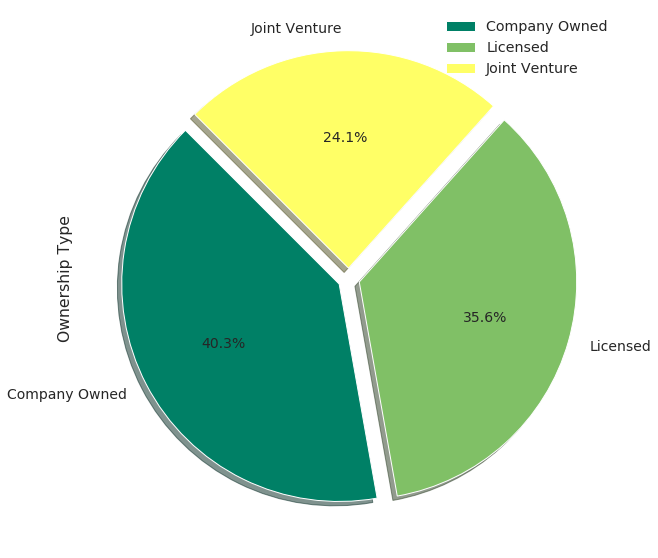

In [92]:
df_merge["Ownership Type"].value_counts().plot(kind="pie",explode=[0.05,0.05,0.05], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')

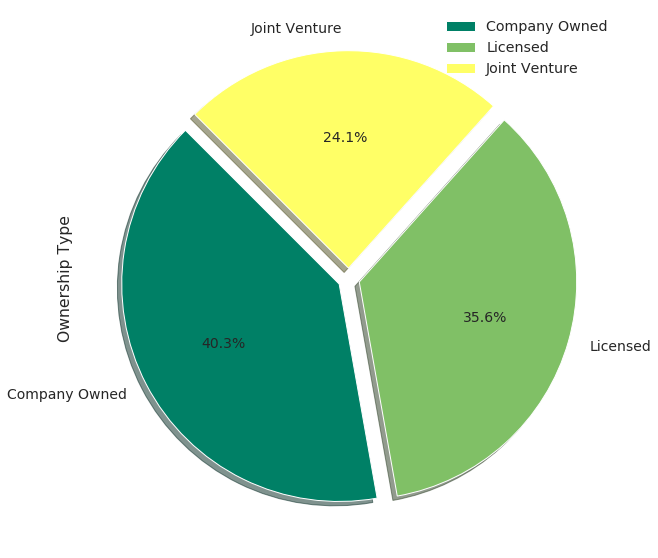

In [93]:
df_merge['Ownership Type'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')

In [85]:
pip install matplotlib pandas seaborn bokeh plotly

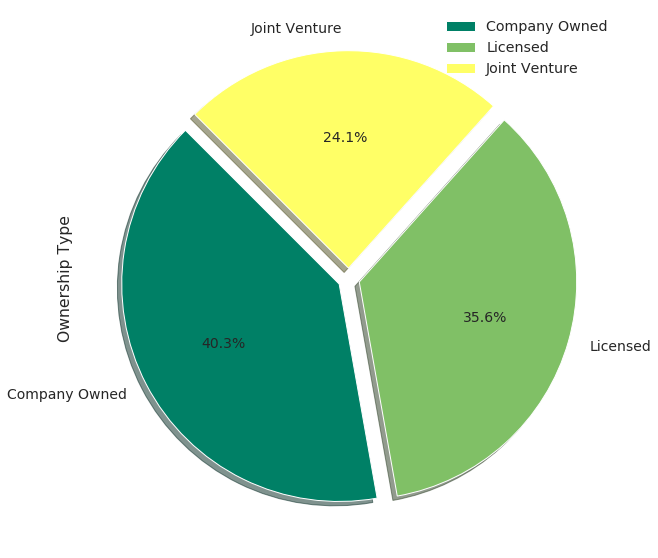

In [94]:
df_merge['Ownership Type'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')

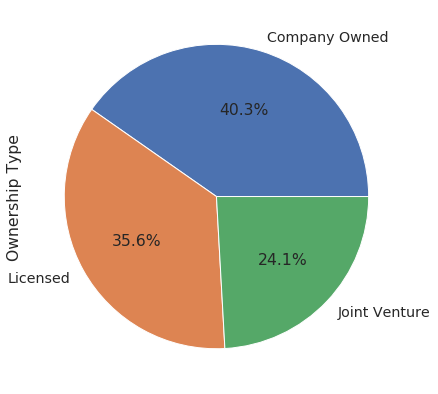

In [95]:
df_merge["Ownership Type"].value_counts().plot.pie(figsize=(10,7),autopct="%3.1f%%")

In [50]:
df_merge["Revenue"].sort_values(ascending=False)

139    49.681
133    49.416
120    49.044
210    48.907
103    48.779
        ...  
29     1.777 
17     1.305 
49     1.097 
1      1.059 
30     1.001 
Name: Revenue, Length: 340, dtype: float64

In [51]:
df_merge.iloc[df_merge["Revenue"].sort_values(ascending=False)[:10].index]


,Store ID,Store Name,Ownership Type,Street Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
139,10753-102015,19th & Telephone,Company Owned,620 SW 19th Street,Moore,OK,US,-97.50,35.32,49.681,4.066,38.749,21.292,17.457,149,4056,Premium Grilled Chicken Classic Sandwich,Chicken & Fish,200,350,28,9.0,2.0,0.0,65,42,8,3,820
133,27316-246764,Fort Sill BX,Licensed,1718 Macomb Rd,Fort Sill,OK,US,-98.40,34.67,49.416,5.617,35.081,21.178,13.903,148,7112,McDouble,Beef & Pork,147,380,22,17.0,8.0,1.0,75,34,7,2,840
120,76740-99373,Target Cleveland South T-2228,Licensed,3465 Steelyard Dr,Cleveland,OH,US,-81.69,41.46,49.044,12.418,19.764,21.019,-1.255,147,20506,Cinnamon Melts,Breakfast,114,460,6,19.0,9.0,0.0,15,66,32,3,370
210,72668-65003,Super Target Tuscaloosa ST-1787,Licensed,1901 13th Ave E,Tuscaloosa,AL,US,-87.51,33.20,48.907,13.431,17.402,20.960,-3.559,146,22564,1% Low Fat Milk Jug,Cold Beverages,236,100,8,2.5,1.5,0.0,10,12,12,0,125
103,15847-160724,Target Gateway T-1401,Licensed,519 Gateway Dr,Brooklyn,NY,US,-73.87,40.65,48.779,5.765,34.146,20.905,13.240,146,7545,Sausage McGriddles,Breakfast,141,420,11,22.0,8.0,0.0,35,44,15,2,1030
338,20344-204610,Target Fountain Hills T-1432,Licensed,16825 E. Shea Boulevard,Fountain Hills,AZ,US,-111.72,33.57,48.745,7.053,31.278,20.891,10.387,146,10091,McFlurry with Reese's Peanut Butter Cups (Medium),Smoothies & Shakes,403,810,21,32.0,15.0,1.0,60,114,103,2,400
258,9813-97844,JFK & McCain,Company Owned,4824 JFK,North LIttle Rock,AR,US,-92.25,34.80,48.689,8.021,29.095,20.867,8.228,146,12015,Mocha (Small),Hot Beverages,340,340,10,11.0,7.0,0.0,35,49,42,2,150
302,13949-109207,SR 135 & Faith,Company Owned,311 S. State Rd 135,Greenwood,IN,US,-86.16,39.61,48.570,2.887,40.275,20.816,19.459,145,1906,Iced Nonfat Caramel Mocha (Large),Hot Beverages,623,370,14,6.0,3.5,0.0,25,65,59,1,250
291,9706-96992,Champaign - 5th & Green,Company Owned,503 E. Green Street,Champaign,IL,US,-88.23,40.11,48.424,12.536,18.908,20.753,-1.846,145,21052,Iced Mocha (Small),Hot Beverages,340,290,8,11.0,7.0,0.0,35,41,34,1,125
105,7381-1628,Elmwood Avenue,Company Owned,933 Elmwood Avenue,Buffalo,NY,US,-78.88,42.92,48.291,8.185,28.352,20.696,7.656,145,12471,"Sausage, Egg & Cheese McGriddles with Egg Whites",Breakfast,205,500,21,26.0,10.0,0.0,50,46,15,2,1320


In [52]:
df_merge.iloc[df_merge['Revenue'].sort_values(ascending=False)[:10].index, :]

,Store ID,Store Name,Ownership Type,Street Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
139,10753-102015,19th & Telephone,Company Owned,620 SW 19th Street,Moore,OK,US,-97.50,35.32,49.681,4.066,38.749,21.292,17.457,149,4056,Premium Grilled Chicken Classic Sandwich,Chicken & Fish,200,350,28,9.0,2.0,0.0,65,42,8,3,820
133,27316-246764,Fort Sill BX,Licensed,1718 Macomb Rd,Fort Sill,OK,US,-98.40,34.67,49.416,5.617,35.081,21.178,13.903,148,7112,McDouble,Beef & Pork,147,380,22,17.0,8.0,1.0,75,34,7,2,840
120,76740-99373,Target Cleveland South T-2228,Licensed,3465 Steelyard Dr,Cleveland,OH,US,-81.69,41.46,49.044,12.418,19.764,21.019,-1.255,147,20506,Cinnamon Melts,Breakfast,114,460,6,19.0,9.0,0.0,15,66,32,3,370
210,72668-65003,Super Target Tuscaloosa ST-1787,Licensed,1901 13th Ave E,Tuscaloosa,AL,US,-87.51,33.20,48.907,13.431,17.402,20.960,-3.559,146,22564,1% Low Fat Milk Jug,Cold Beverages,236,100,8,2.5,1.5,0.0,10,12,12,0,125
103,15847-160724,Target Gateway T-1401,Licensed,519 Gateway Dr,Brooklyn,NY,US,-73.87,40.65,48.779,5.765,34.146,20.905,13.240,146,7545,Sausage McGriddles,Breakfast,141,420,11,22.0,8.0,0.0,35,44,15,2,1030
338,20344-204610,Target Fountain Hills T-1432,Licensed,16825 E. Shea Boulevard,Fountain Hills,AZ,US,-111.72,33.57,48.745,7.053,31.278,20.891,10.387,146,10091,McFlurry with Reese's Peanut Butter Cups (Medium),Smoothies & Shakes,403,810,21,32.0,15.0,1.0,60,114,103,2,400
258,9813-97844,JFK & McCain,Company Owned,4824 JFK,North LIttle Rock,AR,US,-92.25,34.80,48.689,8.021,29.095,20.867,8.228,146,12015,Mocha (Small),Hot Beverages,340,340,10,11.0,7.0,0.0,35,49,42,2,150
302,13949-109207,SR 135 & Faith,Company Owned,311 S. State Rd 135,Greenwood,IN,US,-86.16,39.61,48.570,2.887,40.275,20.816,19.459,145,1906,Iced Nonfat Caramel Mocha (Large),Hot Beverages,623,370,14,6.0,3.5,0.0,25,65,59,1,250
291,9706-96992,Champaign - 5th & Green,Company Owned,503 E. Green Street,Champaign,IL,US,-88.23,40.11,48.424,12.536,18.908,20.753,-1.846,145,21052,Iced Mocha (Small),Hot Beverages,340,290,8,11.0,7.0,0.0,35,41,34,1,125
105,7381-1628,Elmwood Avenue,Company Owned,933 Elmwood Avenue,Buffalo,NY,US,-78.88,42.92,48.291,8.185,28.352,20.696,7.656,145,12471,"Sausage, Egg & Cheese McGriddles with Egg Whites",Breakfast,205,500,21,26.0,10.0,0.0,50,46,15,2,1320


In [53]:
df_merge.iloc[df_merge["Profits"].sort_values(ascending=False)[:10].index]

,Store ID,Store Name,Ownership Type,Street Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
316,76725-102051,Target Kansas City T-2222,Licensed,10900 Stadium Pkwy,Kansas City,KS,US,-94.83,39.13,46.934,13.514,15.326,20.115,-4.789,141,23842,Strawberry Banana Smoothie (Medium),Smoothies & Shakes,453,250,4,1.0,0.0,0.0,5,58,54,3,60
210,72668-65003,Super Target Tuscaloosa ST-1787,Licensed,1901 13th Ave E,Tuscaloosa,AL,US,-87.51,33.20,48.907,13.431,17.402,20.960,-3.559,146,22564,1% Low Fat Milk Jug,Cold Beverages,236,100,8,2.5,1.5,0.0,10,12,12,0,125
208,72121-3608,U of AL - Ferguson Cntr,Licensed,"1000 McCorvey Dr., UoA-Ferguson Center",Tuscaloosa,AL,US,-87.55,33.21,44.138,12.745,14.334,18.916,-4.582,133,23919,Sprite (Large),Cold Beverages,850,280,0,0.0,0.0,0.0,0,74,74,0,60
220,21772-214865,2001 L St,Company Owned,2001 L St NW,Washington,DC,US,-77.05,38.90,46.254,12.734,16.390,19.823,-3.433,139,22628,Iced Tea (Child),Hot Beverages,340,0,0,0.0,0.0,0.0,0,0,0,0,5
291,9706-96992,Champaign - 5th & Green,Company Owned,503 E. Green Street,Champaign,IL,US,-88.23,40.11,48.424,12.536,18.908,20.753,-1.846,145,21052,Iced Mocha (Small),Hot Beverages,340,290,8,11.0,7.0,0.0,35,41,34,1,125
120,76740-99373,Target Cleveland South T-2228,Licensed,3465 Steelyard Dr,Cleveland,OH,US,-81.69,41.46,49.044,12.418,19.764,21.019,-1.255,147,20506,Cinnamon Melts,Breakfast,114,460,6,19.0,9.0,0.0,15,66,32,3,370
322,6314-6908,Magazine & Washington,Company Owned,2801 Magazine Street,New Orleans,LA,US,-90.08,29.93,44.154,12.329,15.264,18.923,-3.659,133,23005,Vanilla Shake (Medium),Smoothies & Shakes,453,660,14,19.0,12.0,1.0,75,109,81,0,200
299,2659-66300,State Rd 135 & Stonegate,Company Owned,"1011 N. State Rd 135, Greenwood Park",Greenwood,IN,US,-86.16,39.63,46.584,12.325,17.605,19.965,-2.360,140,21599,Iced Caramel Mocha (Large),Hot Beverages,623,460,13,16.0,10.0,0.5,50,65,59,1,250
175,25202-201748,Kroger Southwest Store #572,Licensed,3400 FM 407 E,Bartonville,TX,US,-97.13,33.08,41.786,12.145,13.396,17.908,-4.512,126,24101,Ranch Snack Wrap (Grilled Chicken),Snacks & Sides,121,280,16,13.0,4.5,0.0,45,25,2,1,720
138,76482-98011,Target Midwest City T-2061,Licensed,7305 SE 29th St,Midwest City,OK,US,-97.40,35.44,44.352,12.119,15.916,19.008,-3.092,133,22431,Premium Crispy Chicken Classic Sandwich,Chicken & Fish,213,510,24,22.0,3.5,0.0,45,55,10,3,990


In [54]:
df_merge.iloc[df_merge["Number of Employees"].sort_values(ascending=False)[:10].index]

,Store ID,Store Name,Ownership Type,Street Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
139,10753-102015,19th & Telephone,Company Owned,620 SW 19th Street,Moore,OK,US,-97.50,35.32,49.681,4.066,38.749,21.292,17.457,149,4056,Premium Grilled Chicken Classic Sandwich,Chicken & Fish,200,350,28,9.0,2.0,0.0,65,42,8,3,820
133,27316-246764,Fort Sill BX,Licensed,1718 Macomb Rd,Fort Sill,OK,US,-98.40,34.67,49.416,5.617,35.081,21.178,13.903,148,7112,McDouble,Beef & Pork,147,380,22,17.0,8.0,1.0,75,34,7,2,840
120,76740-99373,Target Cleveland South T-2228,Licensed,3465 Steelyard Dr,Cleveland,OH,US,-81.69,41.46,49.044,12.418,19.764,21.019,-1.255,147,20506,Cinnamon Melts,Breakfast,114,460,6,19.0,9.0,0.0,15,66,32,3,370
258,9813-97844,JFK & McCain,Company Owned,4824 JFK,North LIttle Rock,AR,US,-92.25,34.80,48.689,8.021,29.095,20.867,8.228,146,12015,Mocha (Small),Hot Beverages,340,340,10,11.0,7.0,0.0,35,49,42,2,150
103,15847-160724,Target Gateway T-1401,Licensed,519 Gateway Dr,Brooklyn,NY,US,-73.87,40.65,48.779,5.765,34.146,20.905,13.240,146,7545,Sausage McGriddles,Breakfast,141,420,11,22.0,8.0,0.0,35,44,15,2,1030
338,20344-204610,Target Fountain Hills T-1432,Licensed,16825 E. Shea Boulevard,Fountain Hills,AZ,US,-111.72,33.57,48.745,7.053,31.278,20.891,10.387,146,10091,McFlurry with Reese's Peanut Butter Cups (Medium),Smoothies & Shakes,403,810,21,32.0,15.0,1.0,60,114,103,2,400
210,72668-65003,Super Target Tuscaloosa ST-1787,Licensed,1901 13th Ave E,Tuscaloosa,AL,US,-87.51,33.20,48.907,13.431,17.402,20.960,-3.559,146,22564,1% Low Fat Milk Jug,Cold Beverages,236,100,8,2.5,1.5,0.0,10,12,12,0,125
291,9706-96992,Champaign - 5th & Green,Company Owned,503 E. Green Street,Champaign,IL,US,-88.23,40.11,48.424,12.536,18.908,20.753,-1.846,145,21052,Iced Mocha (Small),Hot Beverages,340,290,8,11.0,7.0,0.0,35,41,34,1,125
167,70334-135770,Tennessee Tech University,Licensed,1000 North Dixie,Cookeville,TN,US,-85.50,36.17,48.278,6.953,31.051,20.691,10.361,145,10025,Premium Southwest Salad (without Chicken),Salads,230,140,6,4.5,2.0,0.0,10,20,6,6,150
105,7381-1628,Elmwood Avenue,Company Owned,933 Elmwood Avenue,Buffalo,NY,US,-78.88,42.92,48.291,8.185,28.352,20.696,7.656,145,12471,"Sausage, Egg & Cheese McGriddles with Egg Whites",Breakfast,205,500,21,26.0,10.0,0.0,50,46,15,2,1320


In [55]:
df_merge.iloc[df_merge["Customers"].sort_values(ascending=False)[:10].index]

,Store ID,Store Name,Ownership Type,Street Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
281,3236-251306,Hwy 44 and Edgewood - Eagle,Company Owned,1598 E. Riverside Dr.,Eagle,ID,US,-116.33,43.69,38.210,11.449,11.494,16.376,-4.882,116,24964,Caramel Iced Coffee (Large),Hot Beverages,907,260,2,9.0,6.0,0.0,35,43,42,0,65
57,19530-197407,Bandra East - FIFC,Joint Venture,"First International Financial Centre, Bandra Kurla Complex Road, Bandra (East)",Mumbai,MH,IN,72.87,19.07,9.918,2.953,3.025,4.251,-1.225,99,24780,McFloat Fanta,Desserts,237,152,2,2.0,1.1,0.1,3,32,31,0,390
51,20457-205766,Thane West - Korum Mall,Joint Venture,"Upper Ground Level, Korum Mall, Off Eastern Express highway",Mumbai,MH,IN,72.97,19.20,9.850,2.914,3.045,4.221,-1.176,98,24599,Kinley Water,Cold Beverages,500,0,0,0.0,0.0,0.0,0,0,0,0,0
275,73744-103865,Hy-Vee - Bettendorf #1,Licensed,2900 Devils Glen Rd,Bettendorf,IA,US,-90.48,41.55,23.799,7.007,7.431,10.200,-2.768,75,24465,Hot Chocolate with Nonfat Milk (Large),Hot Beverages,566,400,19,3.5,2.5,0.0,20,74,69,1,280
38,21743-215051,Church Street,Joint Venture,"Ground Floor, Prestige RR Building, 55 and 51/1 Church Street",Bangalore,MH,IN,77.61,12.97,9.754,2.860,3.073,4.180,-1.108,97,24344,Regular Coca-Cola,Cold Beverages,249,110,0,0.0,0.0,0.0,0,27,27,0,230
128,76916-131305,Target Wasilla T-2339,Licensed,1801 E Parks Hwy,Wasilla,AK,US,-149.41,61.58,40.710,11.895,12.912,17.447,-4.535,123,24250,Double Quarter Pounder with Cheese,Beef & Pork,283,750,48,43.0,19.0,2.5,160,42,10,3,1280
327,18029-182674,Kroger Shreveport # 539,Licensed,6652 Youree Dr,Shreveport,LA,US,-93.72,32.45,21.969,6.409,6.991,9.415,-2.424,69,24205,Chocolate Shake (Small),Smoothies & Shakes,340,560,12,16.0,10.0,1.0,60,91,77,1,240
20,19514-197404,Indira Gandhi Itnl Arpt-T3Gate27,Joint Venture,"Domestic Departure, Near Gate 27, Terminal 3",New Delhi,DL,IN,77.10,28.56,9.686,2.821,3.092,4.151,-1.060,97,24162,Large Fries,Snacks & Sides,220,685,10,35.0,16.2,0.2,0,82,1,9,520
255,11709-104595,Maumelle & Audubon,Company Owned,105 Commons Drive,Maumelle,AR,US,-92.40,34.85,33.984,9.891,10.866,14.565,-3.699,104,24139,Nonfat Latte with Sugar Free French Vanilla Syrup (Small),Hot Beverages,340,140,10,0.0,0.0,0.0,5,24,13,1,150
175,25202-201748,Kroger Southwest Store #572,Licensed,3400 FM 407 E,Bartonville,TX,US,-97.13,33.08,41.786,12.145,13.396,17.908,-4.512,126,24101,Ranch Snack Wrap (Grilled Chicken),Snacks & Sides,121,280,16,13.0,4.5,0.0,45,25,2,1,720


In [56]:
df_merge.head()

,Store ID,Store Name,Ownership Type,Street Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
0,23149-228271,Banjara Hills,Joint Venture,"Lower Ground Floor, GVK One, Road Number 1, Banjara Hills",Hyderabad,AP,IN,78.45,17.42,2.117,0.172,1.655,0.907,0.748,34,3979,Egg & Cheese Muﬃn,Breakfast,112,290,14,13.0,7.0,0.2,244,28,2,2,620
1,23191-228548,Kukatpally,Joint Venture,"Upper Ground Floor, Forum Sujana Mall, Kukatpally",Hyderabad,AP,IN,78.39,17.48,1.059,0.055,0.896,0.454,0.442,25,1156,Sausage McMuﬀm,Breakfast,112,273,16,11.0,5.7,0.2,50,28,2,2,950
2,23193-228546,Madhapur,Joint Venture,"Lower Ground Floor, Inorbit Mall, Madhapur",Hyderabad,AP,IN,78.39,17.43,4.505,0.664,2.864,1.931,0.934,54,10346,Sausage & Egg McMuﬀm,Breakfast,157,355,22,17.0,7.9,0.2,277,29,2,2,1020
3,23180-228545,Jubilee Hills,Joint Venture,"Ground Floor, Road No. 92, Near Apollo hospital, Jubilee Hills",Hyderabad,AP,IN,78.42,17.42,3.406,0.398,2.394,1.460,0.935,45,7414,Veg McMuﬀm,Breakfast,119,299,10,12.0,7.2,0.2,21,38,3,3,1000
4,24457-238129,Hi-Tech City,Joint Venture,"Upper Ground Floor, Phoenix tower A, Opposite Trident Hotel, Madhapur Village",Hyderabad,AP,IN,78.38,17.45,7.333,1.657,3.395,3.143,0.252,77,17887,Veg Supreme Muﬃn,Breakfast,139,299,7,13.0,5.2,0.2,11,39,4,4,960


In [57]:
df_merge["Category"].value_counts()

Hot Beverages           99
Breakfast               49
Cold Beverages          45
Smoothies & Shakes      34
Chicken & Fish          26
Desserts                24
Snacks & Sides          17
Beef & Pork             15
Sandwiches and Wraps    10
Salads                  6 
New Products            5 
Condiments              5 
Nuggets                 3 
Chicken Wings           2 
Name: Category, dtype: int64

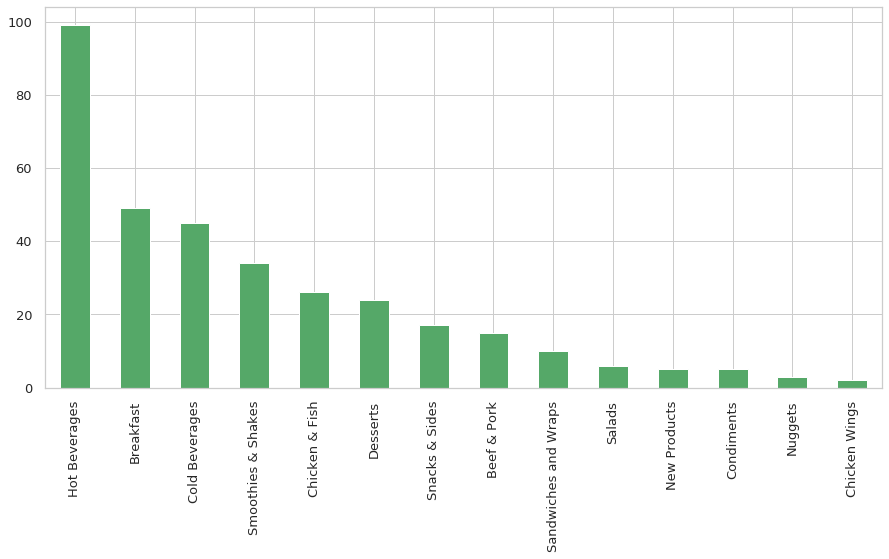

In [96]:
df_merge["Category"].value_counts().plot.bar(figsize=(15,7),color="g",fontsize=13)

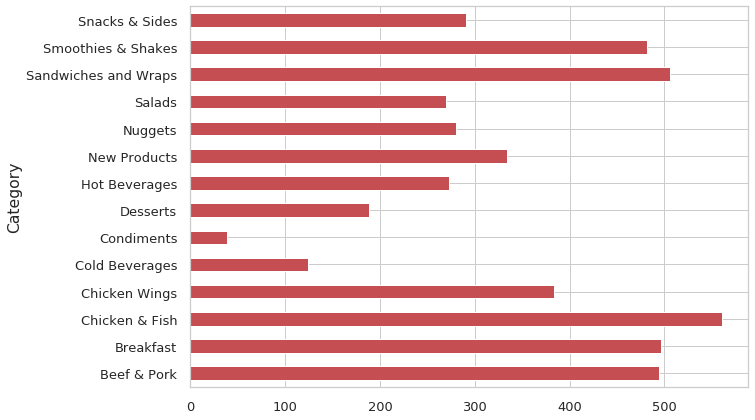

In [97]:
df_merge.groupby(["Category"])["Energy"].mean().plot.barh(figsize=(10,7),color="r",fontsize=13)

In [60]:
df_merge["Best Selling Item"].value_counts()

McFlurry with Reese's Peanut Butter Cups (Medium)    1
Minute Maid Orange Juice (Small)                     1
Chicken Wings 2 Piece*                               1
Premium McWrap Chicken & Ranch (Grilled Chicken)     1
Kids French Fries                                    1
                                                    ..
Mustard Sauce                                        1
Regular Thums-up                                     1
Medium Chocolate Milkshake                           1
French Vanilla Iced Coffee (Small)                   1
McVeggie                                             1
Name: Best Selling Item, Length: 340, dtype: int64

In [61]:
df_merge["Grilled"]=df_merge["Best Selling Item"].str.contains("Grilled")
df_merge["Grilled"].head()

0    False
1    False
2    False
3    False
4    False
Name: Grilled, dtype: bool

In [62]:
df_merge[df_merge["Grilled"]]

,Store ID,Store Name,Ownership Type,Street Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium,Grilled
139,10753-102015,19th & Telephone,Company Owned,620 SW 19th Street,Moore,OK,US,-97.50,35.32,49.681,4.066,38.749,21.292,17.457,149,4056,Premium Grilled Chicken Classic Sandwich,Chicken & Fish,200,350,28,9.0,2.0,0.0,65,42,8,3,820,True
141,3415-86784,9th & Garfield - Corvallis,Company Owned,"1705 NW 9th Street, Suite B",Corvallis,OR,US,-123.26,44.58,38.106,8.172,18.605,16.331,2.273,116,16786,Premium Grilled Chicken Club Sandwich,Chicken & Fish,235,510,40,20.0,7.0,0.0,105,44,9,3,1250,True
143,10170-96331,"244 Ellendale Ave- Dallas, OR",Company Owned,"244 E Ellendale Ave, 1",Dallas,OR,US,-123.31,44.93,28.751,7.268,11.612,12.322,-0.710,89,20467,Premium Grilled Chicken Ranch BLT Sandwich,Chicken & Fish,217,450,36,15.0,4.5,0.0,90,43,9,3,1230,True
145,79622-104108,Safeway - Boring #521,Licensed,20151 SE 212th,Damascus,OR,US,-122.46,45.42,19.283,3.393,11.048,8.264,2.783,62,13091,Bacon Clubhouse Grilled Chicken Sandwich,Chicken & Fish,270,590,40,25.0,8.0,0.0,110,51,14,4,1560,True
151,10052-99312,"Robinson, Lafayette Plaza",Company Owned,227 Summit Park Drive,Pittsburgh,PA,US,-80.18,40.45,24.401,4.027,14.566,10.457,4.108,76,12043,Premium McWrap Chicken & Bacon (Grilled Chicken),Chicken & Fish,302,480,36,19.0,7.0,0.0,95,42,6,3,1370,True
153,24889-237527,Target Plymouth Meeting T-1269,Licensed,2250 Chemical Rd,Plymouth Meeting,PA,US,-75.29,40.10,46.177,5.910,31.329,19.790,11.539,139,8485,Premium McWrap Chicken & Ranch (Grilled Chicken),Chicken & Fish,297,450,30,18.0,6.0,0.5,80,42,6,3,1170,True
155,764-603,Plymouth Meeting,Company Owned,"413 West Germantown Pike, Philadelphia Premium Outlets",Plymouth Meeting,PA,US,-75.29,40.11,21.704,4.074,11.873,9.302,2.572,69,14219,Premium McWrap Southwest Chicken (Grilled Chicken),Chicken & Fish,318,520,31,20.0,6.0,0.0,80,55,10,5,1320,True
157,7940-95325,Quakertown,Company Owned,262 North Westend Boulevard,Quakertown,PA,US,-75.36,40.45,19.859,1.548,15.659,8.511,7.148,63,3683,Premium McWrap Chicken Sweet Chili (Grilled Chicken),Chicken & Fish,291,380,27,10.0,3.0,0.0,65,47,12,3,1090,True
166,10616-101627,Jefferson & Interstate,Company Owned,1105 Interstate Drive,Cookeville,TN,US,-85.51,36.14,33.230,2.326,26.784,14.241,12.542,102,2919,Premium Bacon Ranch Salad with Grilled Chicken,Salads,241,220,29,8.0,4.0,0.0,85,8,4,2,690,True
169,6386-13970,William Cannon & Westgate,Company Owned,6816 Westgate Blvd.,Austin,TX,US,-97.82,30.21,44.057,10.912,18.287,18.881,-0.594,133,19978,Premium Southwest Salad with Grilled Chicken,Salads,335,290,27,8.0,2.5,0.0,70,28,10,7,680,True


In [63]:
df_merge["Crispy"]=df_merge["Best Selling Item"].str.contains("Crispy")
df_merge[df_merge["Crispy"]]

,Store ID,Store Name,Ownership Type,Street Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium,Grilled,Crispy
138,76482-98011,Target Midwest City T-2061,Licensed,7305 SE 29th St,Midwest City,OK,US,-97.40,35.44,44.352,12.119,15.916,19.008,-3.092,133,22431,Premium Crispy Chicken Classic Sandwich,Chicken & Fish,213,510,24,22.0,3.5,0.0,45,55,10,3,990,False,True
140,458-1344,Timberhill,Company Owned,2305 NW Kings Blvd,Corvallis,OR,US,-123.28,44.59,29.562,8.125,10.506,12.669,-2.164,91,22583,Premium Crispy Chicken Club Sandwich,Chicken & Fish,249,670,36,33.0,9.0,0.0,85,58,11,3,1410,False,True
142,79547-104100,Safeway - Cottage Grove #1458,Licensed,1500 E Main Street,Cottage Grove,OR,US,-123.05,43.80,28.026,2.529,21.341,12.011,9.330,87,4862,Premium Crispy Chicken Ranch BLT Sandwich,Chicken & Fish,230,610,32,28.0,6.0,0.0,70,57,11,3,1400,False,True
144,74778-98723,Safeway - Dallas -#4404,Licensed,138 W Ellendale Ave,Dallas,OR,US,-123.31,44.93,46.193,6.864,29.244,19.797,9.447,139,10465,Bacon Clubhouse Crispy Chicken Sandwich,Chicken & Fish,284,750,36,38.0,10.0,0.5,90,65,16,4,1720,False,True
146,70366-136369,Safeway-Eugene #4513,Licensed,350 E 40th Ave,Eugene,OR,US,-123.09,44.01,33.455,7.667,15.251,14.338,0.913,102,18199,Southern Style Crispy Chicken Sandwich,Chicken & Fish,160,430,21,19.0,3.0,0.0,45,43,7,2,910,False,True
150,7887-72865,Sixth Street,Company Owned,"202 Sixth Street, Lafayette Plaza",Pittsburgh,PA,US,-80.00,40.44,19.539,2.000,14.356,8.374,5.983,62,6028,Premium McWrap Chicken & Bacon (Crispy Chicken),Chicken & Fish,316,630,32,32.0,9.0,0.5,80,56,7,3,1540,False,True
152,17198-172190,Cumberland Valley Travel Plaza,Licensed,Pennsylvania Turnpike MP 219.12,Plainfield,PA,US,-77.28,40.21,21.436,6.078,7.206,9.187,-1.981,68,23422,Premium McWrap Chicken & Ranch (Crispy Chicken),Chicken & Fish,310,610,27,31.0,8.0,0.5,65,56,8,3,1340,False,True
154,24455-93327,Giant-Plymouth Meeting #11,Licensed,2450 Chemical Rd,Plymouth Meeting,PA,US,-75.29,40.10,34.809,9.092,13.413,14.918,-1.505,106,21276,Premium McWrap Southwest Chicken (Crispy Chicken),Chicken & Fish,314,670,27,33.0,8.0,0.5,60,68,12,5,1480,False,True
156,14221-107001,Philadelphia Premium Outlets,Company Owned,"18 Lightcap Road, 1039, Trainers Corner Shopping Center",Pottstown,PA,US,-75.57,40.24,41.092,3.204,32.400,17.611,14.789,124,3684,Premium McWrap Chicken Sweet Chili (Crispy Chicken),Chicken & Fish,304,540,23,23.0,4.5,0.0,50,61,14,3,1260,False,True
165,25983-237524,Kroger Columbia #507,Licensed,1202 S James Campbell Blvd,Columbia,TN,US,-87.06,35.60,28.379,6.794,12.296,12.162,0.134,88,19183,Premium Bacon Ranch Salad with Crispy Chicken,Salads,255,380,25,21.0,6.0,0.0,70,22,5,2,860,False,True


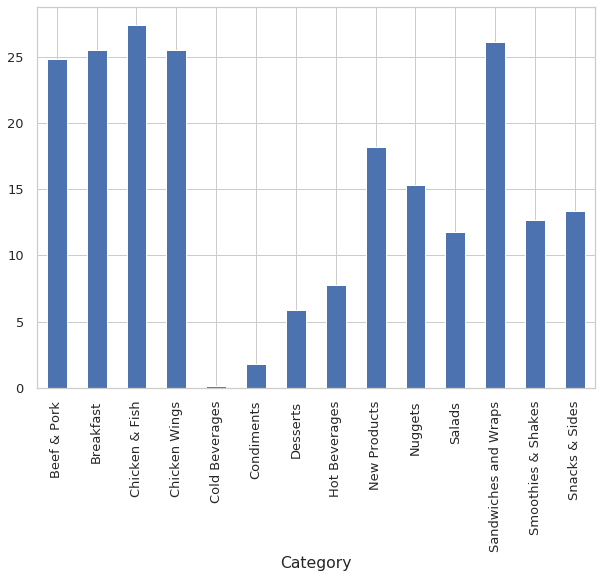

In [98]:
df_merge.groupby(["Category"])["Total_Fat"].mean().plot.bar(figsize=(10,7),color="b",fontsize=13)

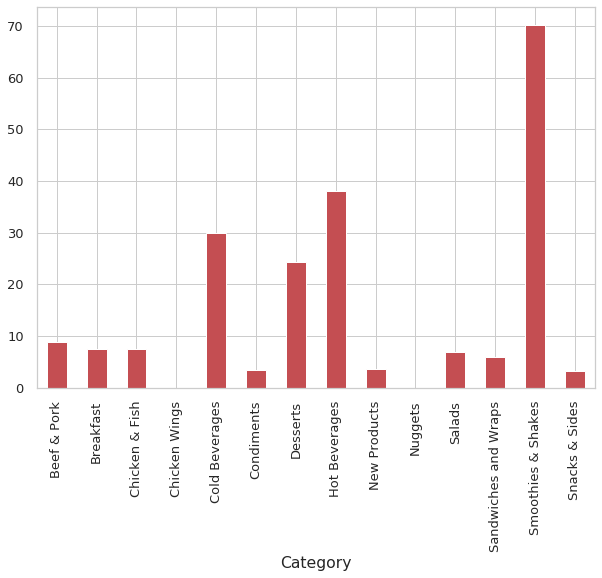

In [99]:
df_merge.groupby(["Category"])["Sugars"].mean().plot.bar(figsize=(10,7),color="r",fontsize=13)

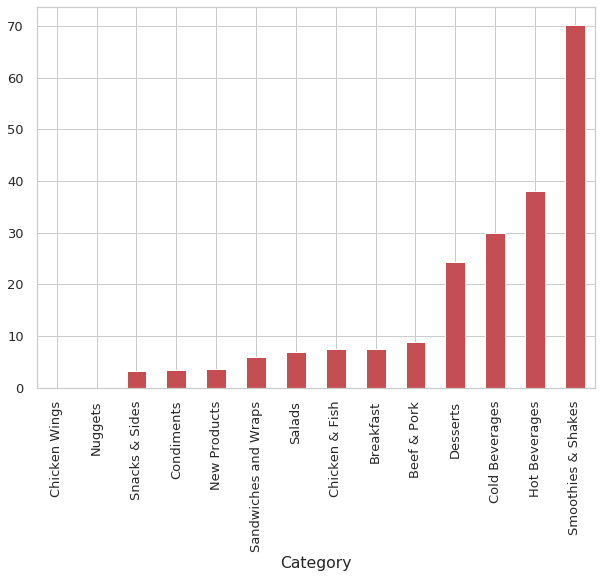

In [100]:
df_merge.groupby(["Category"])["Sugars"].mean().sort_values().plot.bar(figsize=(10,7),color="r",fontsize=13)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

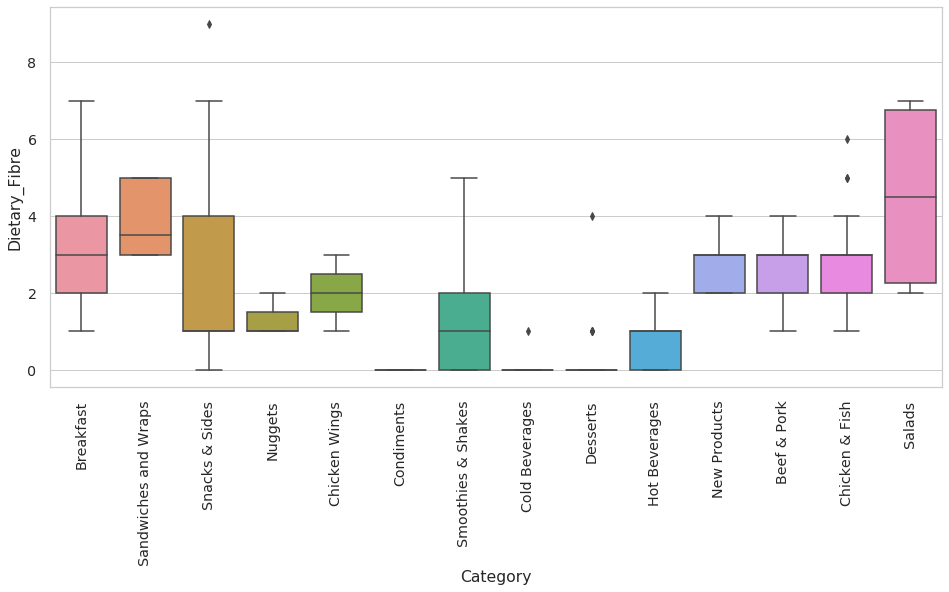

In [101]:
plt.figure(figsize=(16,7))
sns.boxplot(data=df_merge,x="Category",y="Dietary_Fibre",width=0.8)
plt.xticks(rotation=90)

In [68]:
plt.figure(figsize=(16,7))
sns.boxplot(data=df_merge,x="Category",y="Dietary_Fibre")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

In [69]:
df_merge["Category"].value_counts()

Hot Beverages           99
Breakfast               49
Cold Beverages          45
Smoothies & Shakes      34
Chicken & Fish          26
Desserts                24
Snacks & Sides          17
Beef & Pork             15
Sandwiches and Wraps    10
Salads                  6 
New Products            5 
Condiments              5 
Nuggets                 3 
Chicken Wings           2 
Name: Category, dtype: int64

In [70]:
df_merge[df_merge["Category"]=="Salads"]

,Store ID,Store Name,Ownership Type,Street Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium,Grilled,Crispy
164,76241-91588,Target Collierville T-1907,Licensed,325 New Byhalia Rd,Collierville,TN,US,-89.69,35.05,25.813,5.652,12.346,11.063,1.283,80,17220,Premium Bacon Ranch Salad (without Chicken),Salads,223,140,9,7.0,3.5,0.0,25,10,4,3,300,False,False
165,25983-237524,Kroger Columbia #507,Licensed,1202 S James Campbell Blvd,Columbia,TN,US,-87.06,35.60,28.379,6.794,12.296,12.162,0.134,88,19183,Premium Bacon Ranch Salad with Crispy Chicken,Salads,255,380,25,21.0,6.0,0.0,70,22,5,2,860,False,True
166,10616-101627,Jefferson & Interstate,Company Owned,1105 Interstate Drive,Cookeville,TN,US,-85.51,36.14,33.230,2.326,26.784,14.241,12.542,102,2919,Premium Bacon Ranch Salad with Grilled Chicken,Salads,241,220,29,8.0,4.0,0.0,85,8,4,2,690,True,False
167,70334-135770,Tennessee Tech University,Licensed,1000 North Dixie,Cookeville,TN,US,-85.50,36.17,48.278,6.953,31.051,20.691,10.361,145,10025,Premium Southwest Salad (without Chicken),Salads,230,140,6,4.5,2.0,0.0,10,20,6,6,150,False,False
168,10791-102282,Houston Levee & Macon,Company Owned,1181 North Houston Levee,Cordova,TN,US,-89.73,35.16,45.083,5.631,30.893,19.321,11.571,135,8189,Premium Southwest Salad with Crispy Chicken,Salads,348,450,23,22.0,4.5,0.0,50,42,12,7,850,False,True
169,6386-13970,William Cannon & Westgate,Company Owned,6816 Westgate Blvd.,Austin,TX,US,-97.82,30.21,44.057,10.912,18.287,18.881,-0.594,133,19978,Premium Southwest Salad with Grilled Chicken,Salads,335,290,27,8.0,2.5,0.0,70,28,10,7,680,True,False


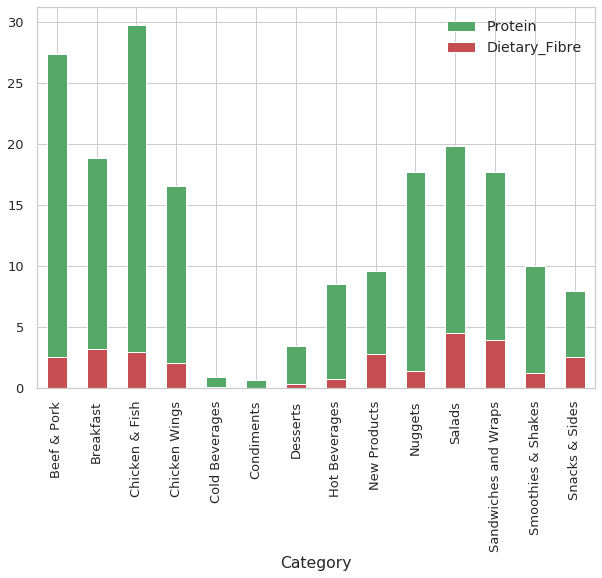

In [102]:
df_merge.groupby(["Category"])["Protein"].mean().plot.bar(figsize=(10,7),color="g",fontsize=13)
df_merge.groupby(["Category"])["Dietary_Fibre"].mean().plot.bar(figsize=(10,7),color="r",fontsize=13)
plt.legend(["Protein","Dietary_Fibre"])

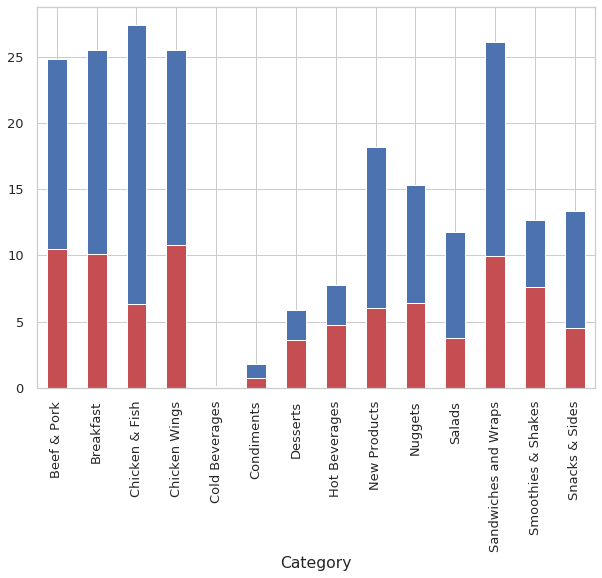

In [103]:
df_merge.groupby(["Category"])["Total_Fat"].mean().plot.bar(figsize=(10,7),color="b",fontsize=13)
df_merge.groupby(["Category"])["Saturated_Fat"].mean().plot.bar(figsize=(10,7),color="r",fontsize=13)

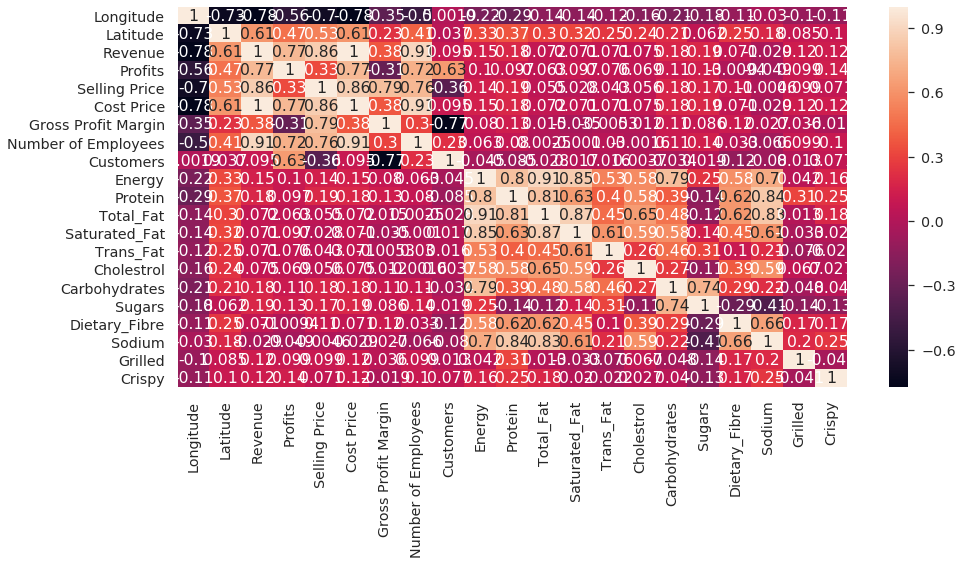

In [104]:
plt.figure(figsize=(15,7))
sns.heatmap(df_merge.corr(),annot=True)

In [74]:
df_merge["Best Selling Item"]

0      Egg & Cheese Muﬃn                                
1      Sausage McMuﬀm                                   
2      Sausage & Egg McMuﬀm                             
3      Veg McMuﬀm                                       
4      Veg Supreme Muﬃn                                 
             ...                                        
335    McFlurry with Oreo Cookies (Small)               
336    McFlurry with Oreo Cookies (Medium)              
337    McFlurry with Oreo Cookies (Snack)               
338    McFlurry with Reese's Peanut Butter Cups (Medium)
339    McFlurry with Reese's Peanut Butter Cups (Snack) 
Name: Best Selling Item, Length: 340, dtype: object

In [75]:
df_merge.head()

,Store ID,Store Name,Ownership Type,Street Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium,Grilled,Crispy
0,23149-228271,Banjara Hills,Joint Venture,"Lower Ground Floor, GVK One, Road Number 1, Banjara Hills",Hyderabad,AP,IN,78.45,17.42,2.117,0.172,1.655,0.907,0.748,34,3979,Egg & Cheese Muﬃn,Breakfast,112,290,14,13.0,7.0,0.2,244,28,2,2,620,False,False
1,23191-228548,Kukatpally,Joint Venture,"Upper Ground Floor, Forum Sujana Mall, Kukatpally",Hyderabad,AP,IN,78.39,17.48,1.059,0.055,0.896,0.454,0.442,25,1156,Sausage McMuﬀm,Breakfast,112,273,16,11.0,5.7,0.2,50,28,2,2,950,False,False
2,23193-228546,Madhapur,Joint Venture,"Lower Ground Floor, Inorbit Mall, Madhapur",Hyderabad,AP,IN,78.39,17.43,4.505,0.664,2.864,1.931,0.934,54,10346,Sausage & Egg McMuﬀm,Breakfast,157,355,22,17.0,7.9,0.2,277,29,2,2,1020,False,False
3,23180-228545,Jubilee Hills,Joint Venture,"Ground Floor, Road No. 92, Near Apollo hospital, Jubilee Hills",Hyderabad,AP,IN,78.42,17.42,3.406,0.398,2.394,1.460,0.935,45,7414,Veg McMuﬀm,Breakfast,119,299,10,12.0,7.2,0.2,21,38,3,3,1000,False,False
4,24457-238129,Hi-Tech City,Joint Venture,"Upper Ground Floor, Phoenix tower A, Opposite Trident Hotel, Madhapur Village",Hyderabad,AP,IN,78.38,17.45,7.333,1.657,3.395,3.143,0.252,77,17887,Veg Supreme Muﬃn,Breakfast,139,299,7,13.0,5.2,0.2,11,39,4,4,960,False,False


In [76]:
df_merge.head()

,Store ID,Store Name,Ownership Type,Street Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium,Grilled,Crispy
0,23149-228271,Banjara Hills,Joint Venture,"Lower Ground Floor, GVK One, Road Number 1, Banjara Hills",Hyderabad,AP,IN,78.45,17.42,2.117,0.172,1.655,0.907,0.748,34,3979,Egg & Cheese Muﬃn,Breakfast,112,290,14,13.0,7.0,0.2,244,28,2,2,620,False,False
1,23191-228548,Kukatpally,Joint Venture,"Upper Ground Floor, Forum Sujana Mall, Kukatpally",Hyderabad,AP,IN,78.39,17.48,1.059,0.055,0.896,0.454,0.442,25,1156,Sausage McMuﬀm,Breakfast,112,273,16,11.0,5.7,0.2,50,28,2,2,950,False,False
2,23193-228546,Madhapur,Joint Venture,"Lower Ground Floor, Inorbit Mall, Madhapur",Hyderabad,AP,IN,78.39,17.43,4.505,0.664,2.864,1.931,0.934,54,10346,Sausage & Egg McMuﬀm,Breakfast,157,355,22,17.0,7.9,0.2,277,29,2,2,1020,False,False
3,23180-228545,Jubilee Hills,Joint Venture,"Ground Floor, Road No. 92, Near Apollo hospital, Jubilee Hills",Hyderabad,AP,IN,78.42,17.42,3.406,0.398,2.394,1.460,0.935,45,7414,Veg McMuﬀm,Breakfast,119,299,10,12.0,7.2,0.2,21,38,3,3,1000,False,False
4,24457-238129,Hi-Tech City,Joint Venture,"Upper Ground Floor, Phoenix tower A, Opposite Trident Hotel, Madhapur Village",Hyderabad,AP,IN,78.38,17.45,7.333,1.657,3.395,3.143,0.252,77,17887,Veg Supreme Muﬃn,Breakfast,139,299,7,13.0,5.2,0.2,11,39,4,4,960,False,False


In [77]:
df_merge["Best Selling Item"].values

array(['Egg & Cheese Muﬃn', 'Sausage McMuﬀm', 'Sausage & Egg McMuﬀm',
       'Veg McMuﬀm', 'Veg Supreme Muﬃn', 'Hot Cakes with Maple Syrup',
       'Hash Brown', 'McEgg Burger', 'Chicken Maharaja Mac', 'McChicken',
       'Filet-0-Fish', 'Chicken McGrill', 'McVeggie', 'McAloo Tikki',
       'McSpicy Paneer Burger', 'BigSpicy Paneer Wrap',
       'McSpicy Chicken Burger', 'BigSpicy Chicken Wrap', 'Regular Fries',
       'Medium Fries', 'Large Fries', 'Veg Pizza McPuﬀ',
       '4 piece Chicken Nuggets', '6 piece Chicken Nuggets',
       '9 piece Chicken Nuggets', 'Chicken Wings 2 Piece*',
       'Chicken Wings 4 Piece*', 'Ketchup', 'Barbecue Sauce',
       'Mustard Sauce', 'Cheese Slice', 'Chilli Sauce',
       'Regular Strawberry Milkshake', 'Medium Strawberry Milkshake',
       'Large Strawberry Milkshake', 'Regular Chocolate Milkshake',
       'Medium Chocolate Milkshake', 'Large Chocolate Milkshake',
       'Regular Coca-Cola', 'Medium Coca-Cola', 'Large Coca-Cola',
       'Regular F

In [105]:
pip install matplotlib pandas seaborn bokeh plotly
plt.figure(figsize=(18,18))
sns.scatterplot(data=df_merge,x=df_merge["Best Selling Item"].values,y=df_merge["Protein"].values)

SyntaxError: ignored

In [0]:
df_merge.head()

In [0]:
df_merge["City"].value_counts()

In [79]:
pip install matplotlib pandas seaborn bokeh plotly


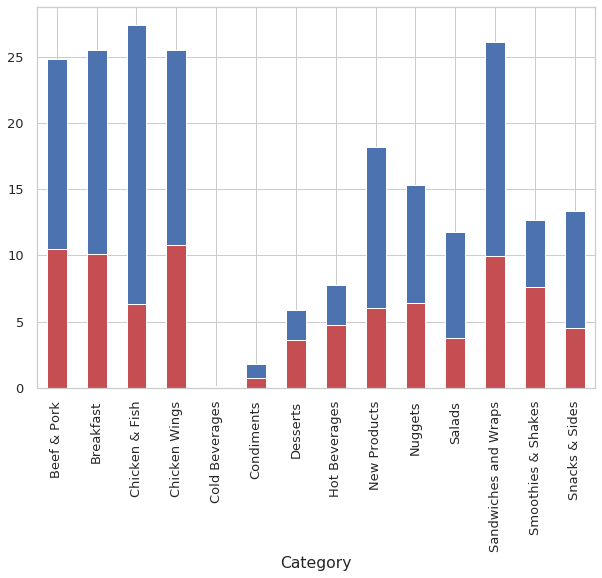

In [106]:
import matplotlib.pyplot as plt
df_merge.groupby(["Category"])["Total_Fat"].mean().plot.bar(figsize=(10,7),color="b",fontsize=13)
df_merge.groupby(["Category"])["Saturated_Fat"].mean().plot.bar(figsize=(10,7),color="r",fontsize=13)

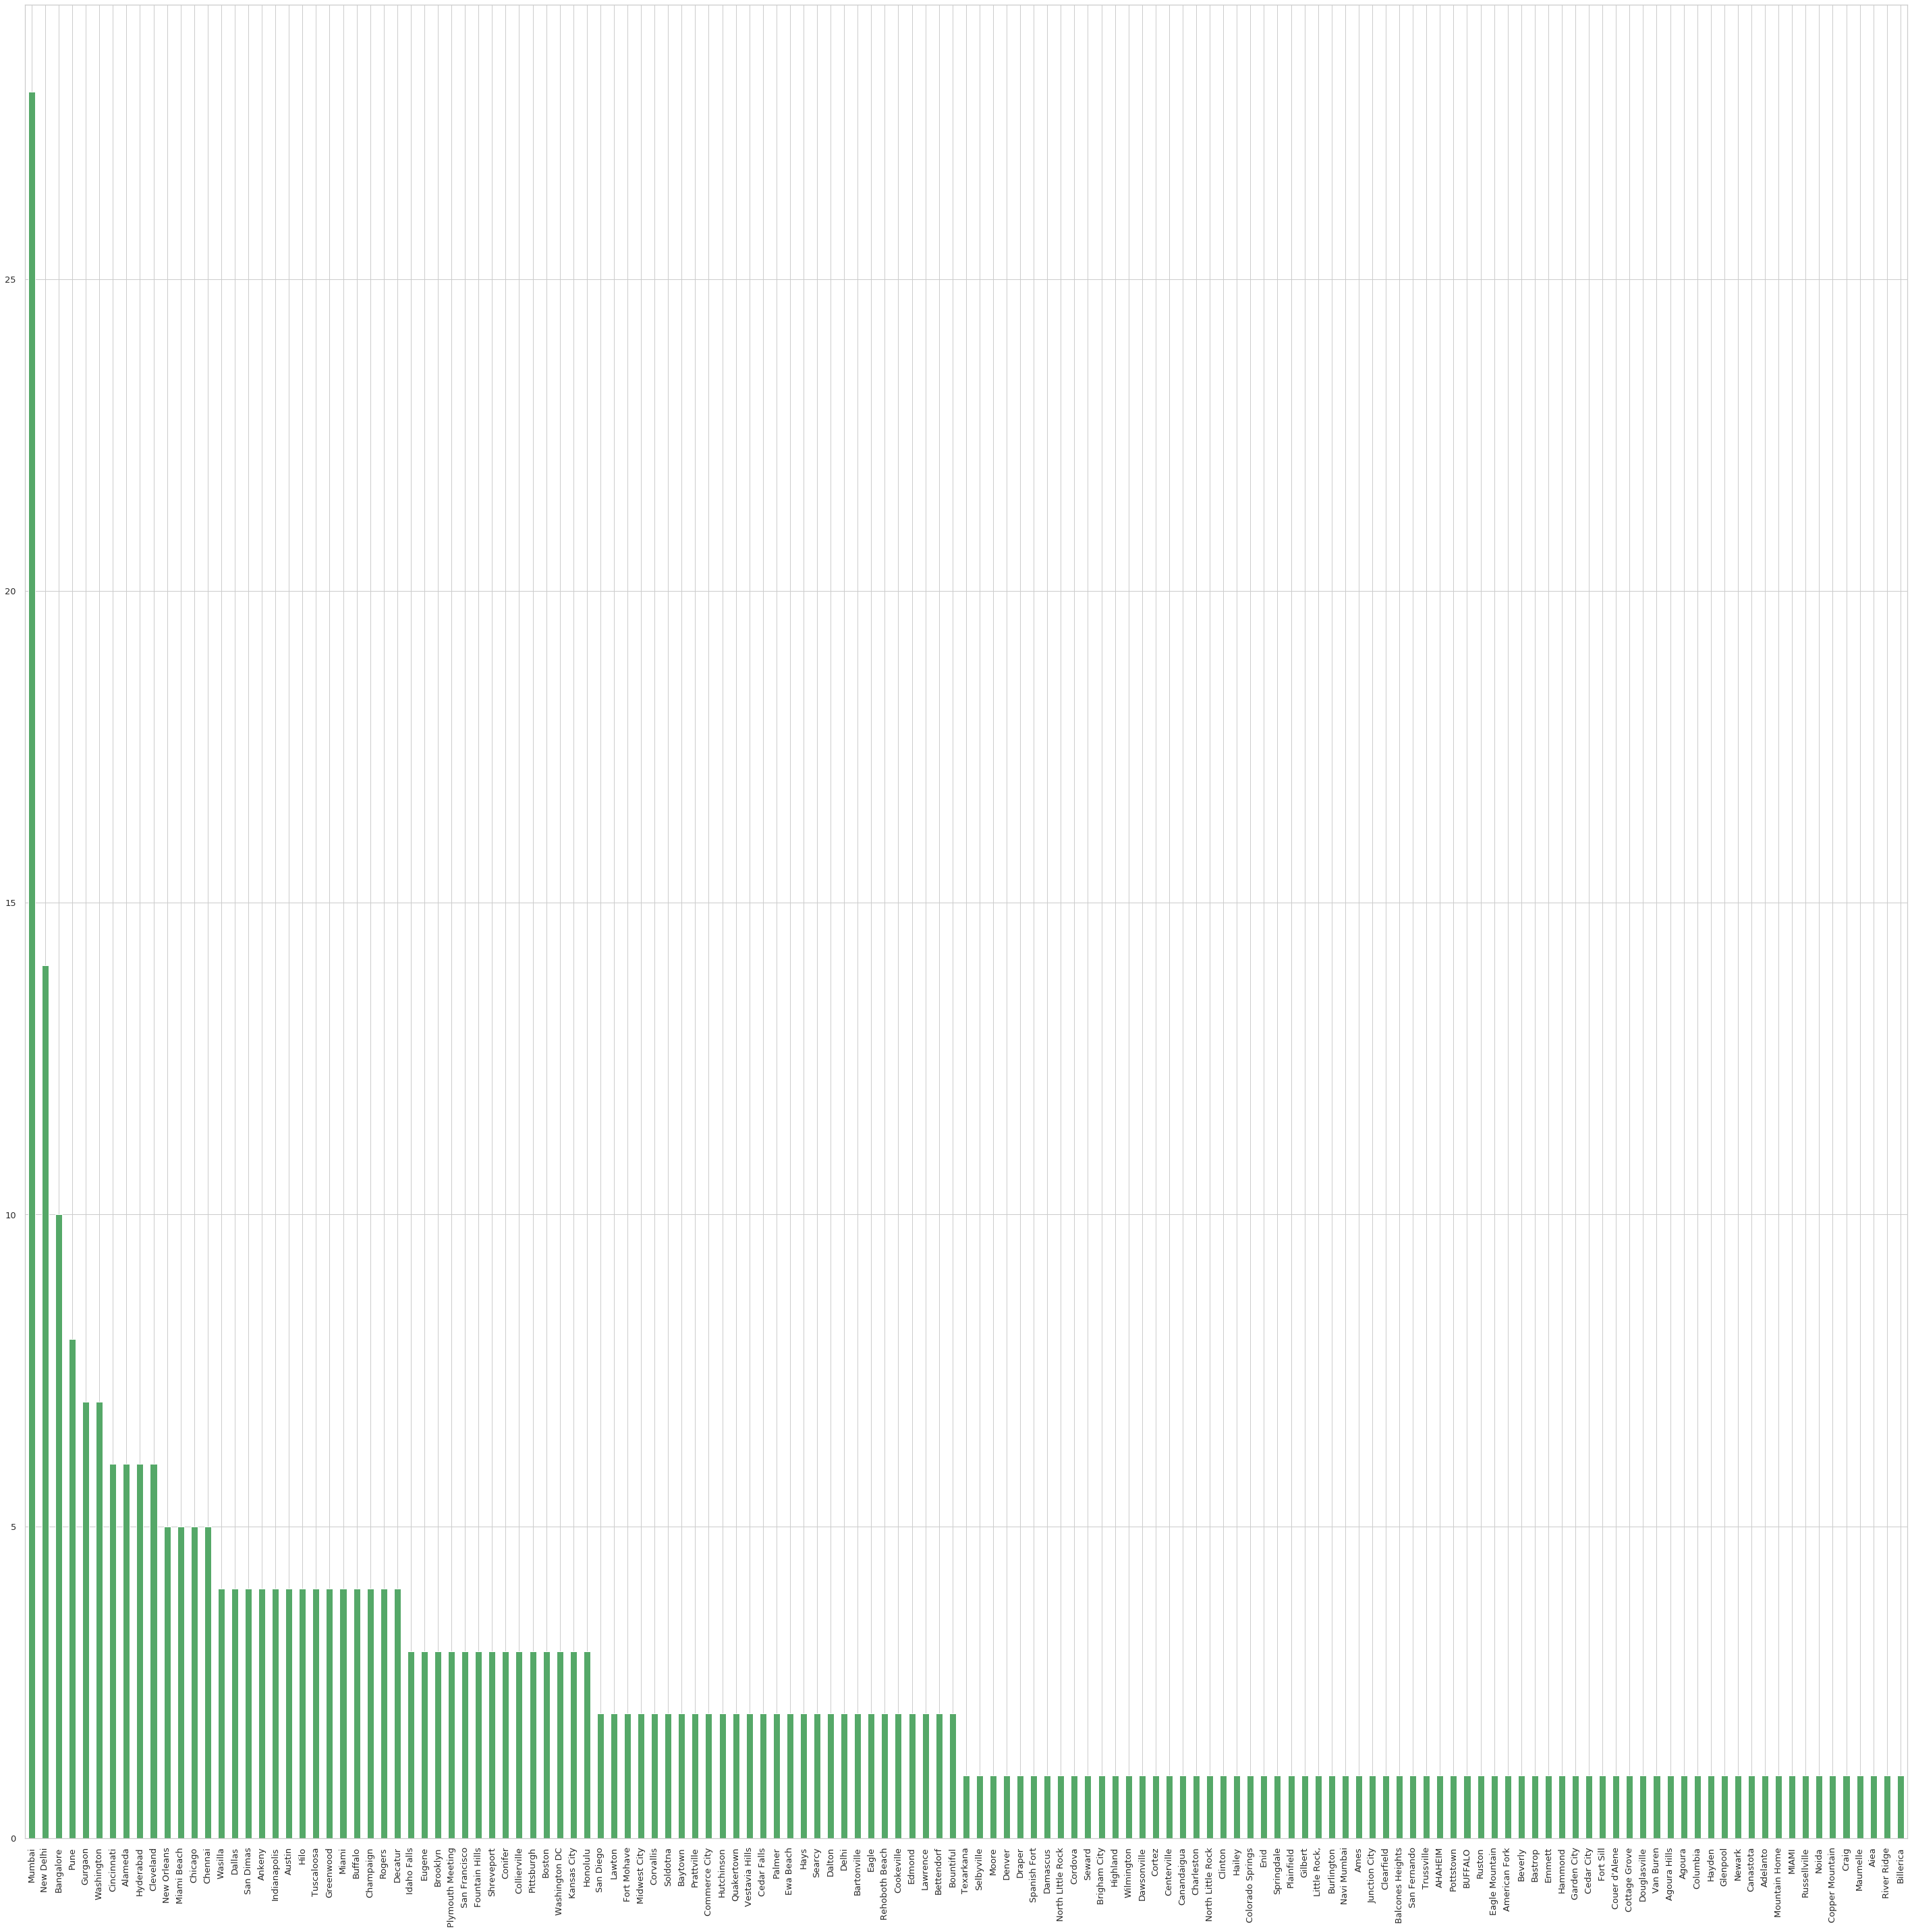

In [108]:
df_merge["City"].value_counts().plot.bar(figsize=(50,50),color="g",fontsize=13)

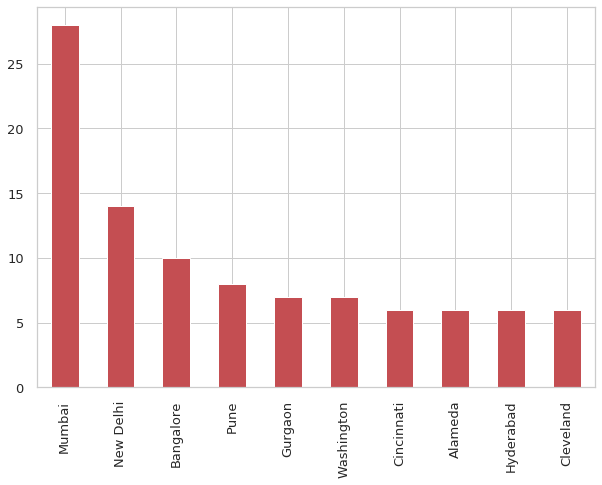

In [110]:
df_merge["City"].value_counts()[:10].plot.bar(figsize=(10,7),color="r",fontsize=13)

In [111]:
df_merge.iloc[df_merge["Revenue"].sort_values(ascending=False)[:10].index]

,Store ID,Store Name,Ownership Type,Street Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium,Grilled,Crispy
139,10753-102015,19th & Telephone,Company Owned,620 SW 19th Street,Moore,OK,US,-97.50,35.32,49.681,4.066,38.749,21.292,17.457,149,4056,Premium Grilled Chicken Classic Sandwich,Chicken & Fish,200,350,28,9.0,2.0,0.0,65,42,8,3,820,True,False
133,27316-246764,Fort Sill BX,Licensed,1718 Macomb Rd,Fort Sill,OK,US,-98.40,34.67,49.416,5.617,35.081,21.178,13.903,148,7112,McDouble,Beef & Pork,147,380,22,17.0,8.0,1.0,75,34,7,2,840,False,False
120,76740-99373,Target Cleveland South T-2228,Licensed,3465 Steelyard Dr,Cleveland,OH,US,-81.69,41.46,49.044,12.418,19.764,21.019,-1.255,147,20506,Cinnamon Melts,Breakfast,114,460,6,19.0,9.0,0.0,15,66,32,3,370,False,False
210,72668-65003,Super Target Tuscaloosa ST-1787,Licensed,1901 13th Ave E,Tuscaloosa,AL,US,-87.51,33.20,48.907,13.431,17.402,20.960,-3.559,146,22564,1% Low Fat Milk Jug,Cold Beverages,236,100,8,2.5,1.5,0.0,10,12,12,0,125,False,False
103,15847-160724,Target Gateway T-1401,Licensed,519 Gateway Dr,Brooklyn,NY,US,-73.87,40.65,48.779,5.765,34.146,20.905,13.240,146,7545,Sausage McGriddles,Breakfast,141,420,11,22.0,8.0,0.0,35,44,15,2,1030,False,False
338,20344-204610,Target Fountain Hills T-1432,Licensed,16825 E. Shea Boulevard,Fountain Hills,AZ,US,-111.72,33.57,48.745,7.053,31.278,20.891,10.387,146,10091,McFlurry with Reese's Peanut Butter Cups (Medium),Smoothies & Shakes,403,810,21,32.0,15.0,1.0,60,114,103,2,400,False,False
258,9813-97844,JFK & McCain,Company Owned,4824 JFK,North LIttle Rock,AR,US,-92.25,34.80,48.689,8.021,29.095,20.867,8.228,146,12015,Mocha (Small),Hot Beverages,340,340,10,11.0,7.0,0.0,35,49,42,2,150,False,False
302,13949-109207,SR 135 & Faith,Company Owned,311 S. State Rd 135,Greenwood,IN,US,-86.16,39.61,48.570,2.887,40.275,20.816,19.459,145,1906,Iced Nonfat Caramel Mocha (Large),Hot Beverages,623,370,14,6.0,3.5,0.0,25,65,59,1,250,False,False
291,9706-96992,Champaign - 5th & Green,Company Owned,503 E. Green Street,Champaign,IL,US,-88.23,40.11,48.424,12.536,18.908,20.753,-1.846,145,21052,Iced Mocha (Small),Hot Beverages,340,290,8,11.0,7.0,0.0,35,41,34,1,125,False,False
105,7381-1628,Elmwood Avenue,Company Owned,933 Elmwood Avenue,Buffalo,NY,US,-78.88,42.92,48.291,8.185,28.352,20.696,7.656,145,12471,"Sausage, Egg & Cheese McGriddles with Egg Whites",Breakfast,205,500,21,26.0,10.0,0.0,50,46,15,2,1320,False,False


In [113]:
df_merge.iloc[df_merge["Profits"].sort_values(ascending=False)[:10].index]

,Store ID,Store Name,Ownership Type,Street Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium,Grilled,Crispy
316,76725-102051,Target Kansas City T-2222,Licensed,10900 Stadium Pkwy,Kansas City,KS,US,-94.83,39.13,46.934,13.514,15.326,20.115,-4.789,141,23842,Strawberry Banana Smoothie (Medium),Smoothies & Shakes,453,250,4,1.0,0.0,0.0,5,58,54,3,60,False,False
210,72668-65003,Super Target Tuscaloosa ST-1787,Licensed,1901 13th Ave E,Tuscaloosa,AL,US,-87.51,33.20,48.907,13.431,17.402,20.960,-3.559,146,22564,1% Low Fat Milk Jug,Cold Beverages,236,100,8,2.5,1.5,0.0,10,12,12,0,125,False,False
208,72121-3608,U of AL - Ferguson Cntr,Licensed,"1000 McCorvey Dr., UoA-Ferguson Center",Tuscaloosa,AL,US,-87.55,33.21,44.138,12.745,14.334,18.916,-4.582,133,23919,Sprite (Large),Cold Beverages,850,280,0,0.0,0.0,0.0,0,74,74,0,60,False,False
220,21772-214865,2001 L St,Company Owned,2001 L St NW,Washington,DC,US,-77.05,38.90,46.254,12.734,16.390,19.823,-3.433,139,22628,Iced Tea (Child),Hot Beverages,340,0,0,0.0,0.0,0.0,0,0,0,0,5,False,False
291,9706-96992,Champaign - 5th & Green,Company Owned,503 E. Green Street,Champaign,IL,US,-88.23,40.11,48.424,12.536,18.908,20.753,-1.846,145,21052,Iced Mocha (Small),Hot Beverages,340,290,8,11.0,7.0,0.0,35,41,34,1,125,False,False
120,76740-99373,Target Cleveland South T-2228,Licensed,3465 Steelyard Dr,Cleveland,OH,US,-81.69,41.46,49.044,12.418,19.764,21.019,-1.255,147,20506,Cinnamon Melts,Breakfast,114,460,6,19.0,9.0,0.0,15,66,32,3,370,False,False
322,6314-6908,Magazine & Washington,Company Owned,2801 Magazine Street,New Orleans,LA,US,-90.08,29.93,44.154,12.329,15.264,18.923,-3.659,133,23005,Vanilla Shake (Medium),Smoothies & Shakes,453,660,14,19.0,12.0,1.0,75,109,81,0,200,False,False
299,2659-66300,State Rd 135 & Stonegate,Company Owned,"1011 N. State Rd 135, Greenwood Park",Greenwood,IN,US,-86.16,39.63,46.584,12.325,17.605,19.965,-2.360,140,21599,Iced Caramel Mocha (Large),Hot Beverages,623,460,13,16.0,10.0,0.5,50,65,59,1,250,False,False
175,25202-201748,Kroger Southwest Store #572,Licensed,3400 FM 407 E,Bartonville,TX,US,-97.13,33.08,41.786,12.145,13.396,17.908,-4.512,126,24101,Ranch Snack Wrap (Grilled Chicken),Snacks & Sides,121,280,16,13.0,4.5,0.0,45,25,2,1,720,True,False
138,76482-98011,Target Midwest City T-2061,Licensed,7305 SE 29th St,Midwest City,OK,US,-97.40,35.44,44.352,12.119,15.916,19.008,-3.092,133,22431,Premium Crispy Chicken Classic Sandwich,Chicken & Fish,213,510,24,22.0,3.5,0.0,45,55,10,3,990,False,True


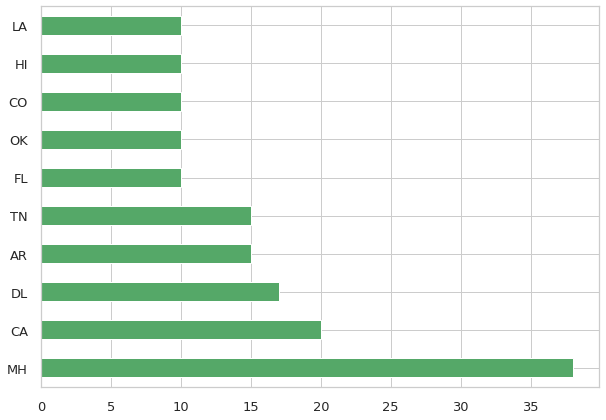

In [114]:
df_merge["State"].value_counts()[:10].plot.barh(figsize=(10,7),color="g",fontsize=13)

Text(0, 0.5, 'Revenue (in million INR)')

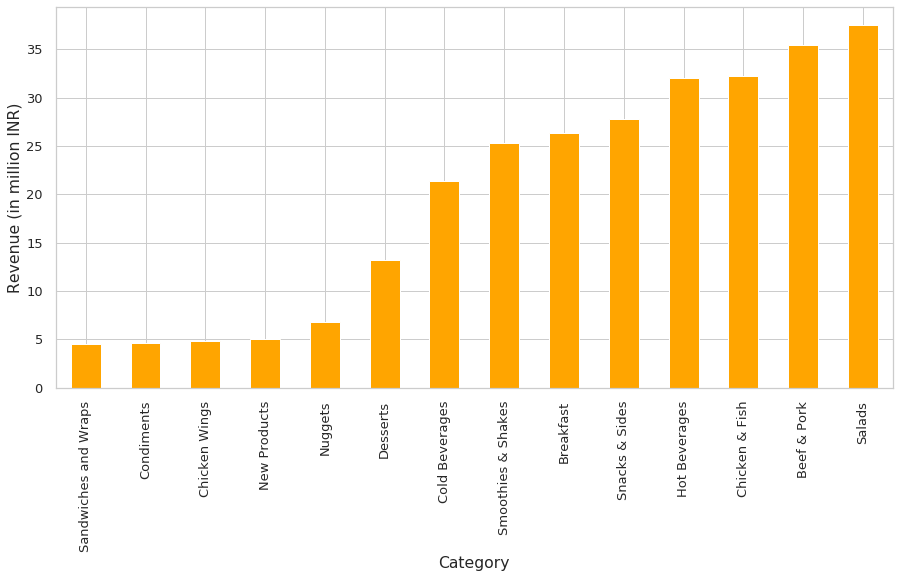

In [115]:
df_merge.groupby(['Category'])['Revenue'].mean().sort_values().plot(kind='bar', figsize=(15,7), fontsize=13, color='orange')
plt.ylabel('Revenue (in million INR)')

Text(0, 0.5, 'Total Selling Price (in million INR)')

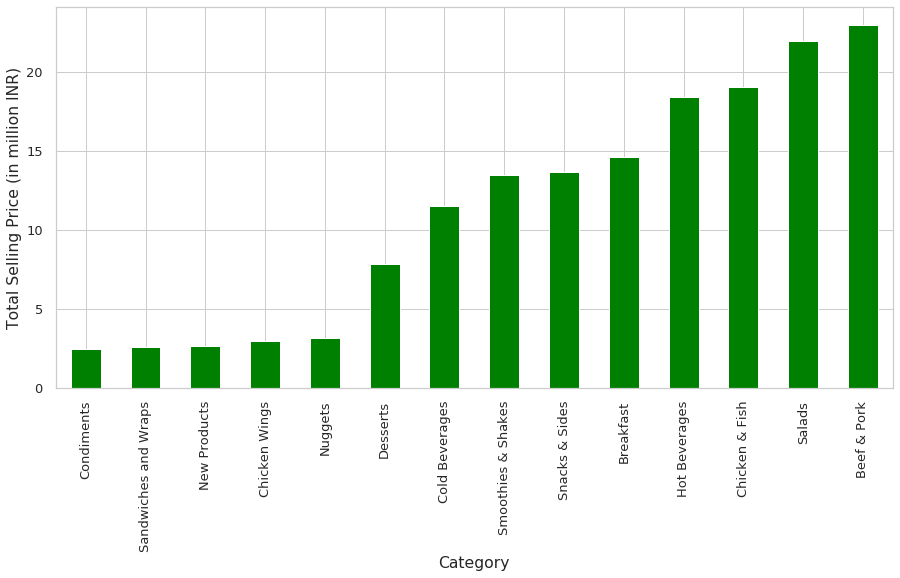

In [117]:
df_merge.groupby(['Category'])['Selling Price'].mean().sort_values().plot(kind='bar', figsize=(15,7), fontsize=13, 
                                                                          color='green')
plt.ylabel('Total Selling Price (in million INR)')

Text(0, 0.5, 'Total Cost Price (in million INR)')

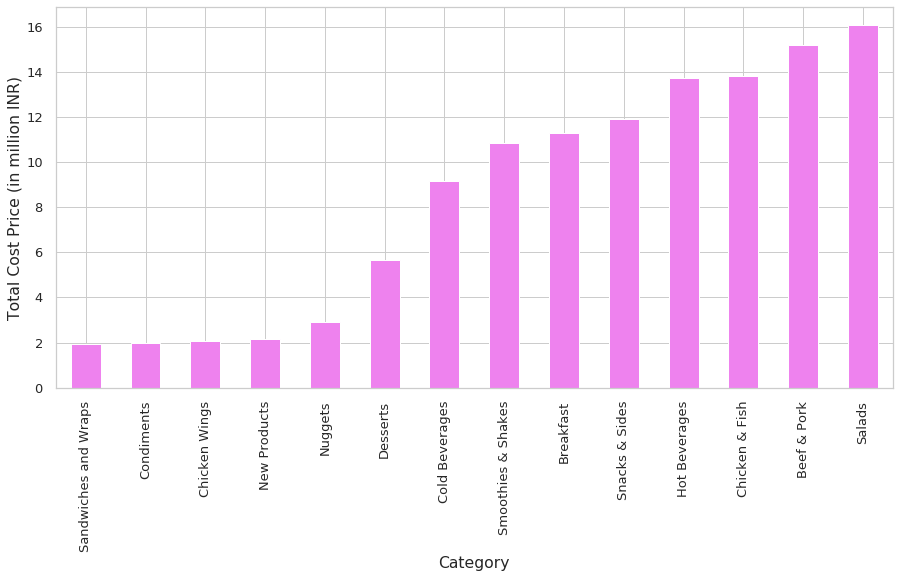

In [119]:
df_merge.groupby(['Category'])['Cost Price'].mean().sort_values().plot(kind='bar', figsize=(15,7), fontsize=13, 
                                                                       color='violet')
plt.ylabel('Total Cost Price (in million INR)')

<Figure size 720x504 with 0 Axes>

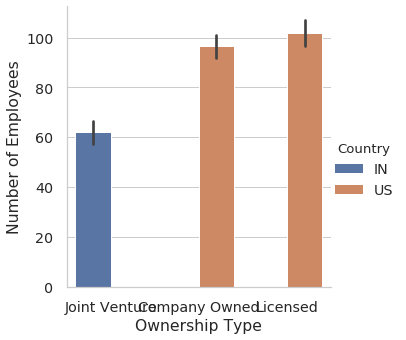

In [125]:
plt.figure(figsize=(10,7))
sns.catplot(x="Ownership Type",y="Number of Employees",data=df_merge,hue="Country",kind="bar")

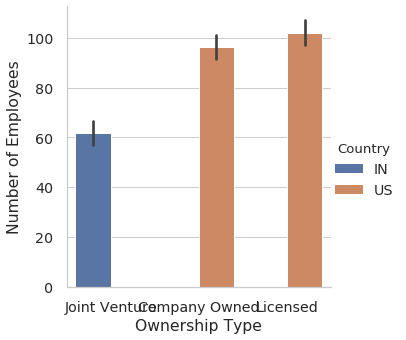

In [126]:
sns.catplot(x="Ownership Type",y="Number of Employees",data=df_merge,hue="Country",kind="bar")

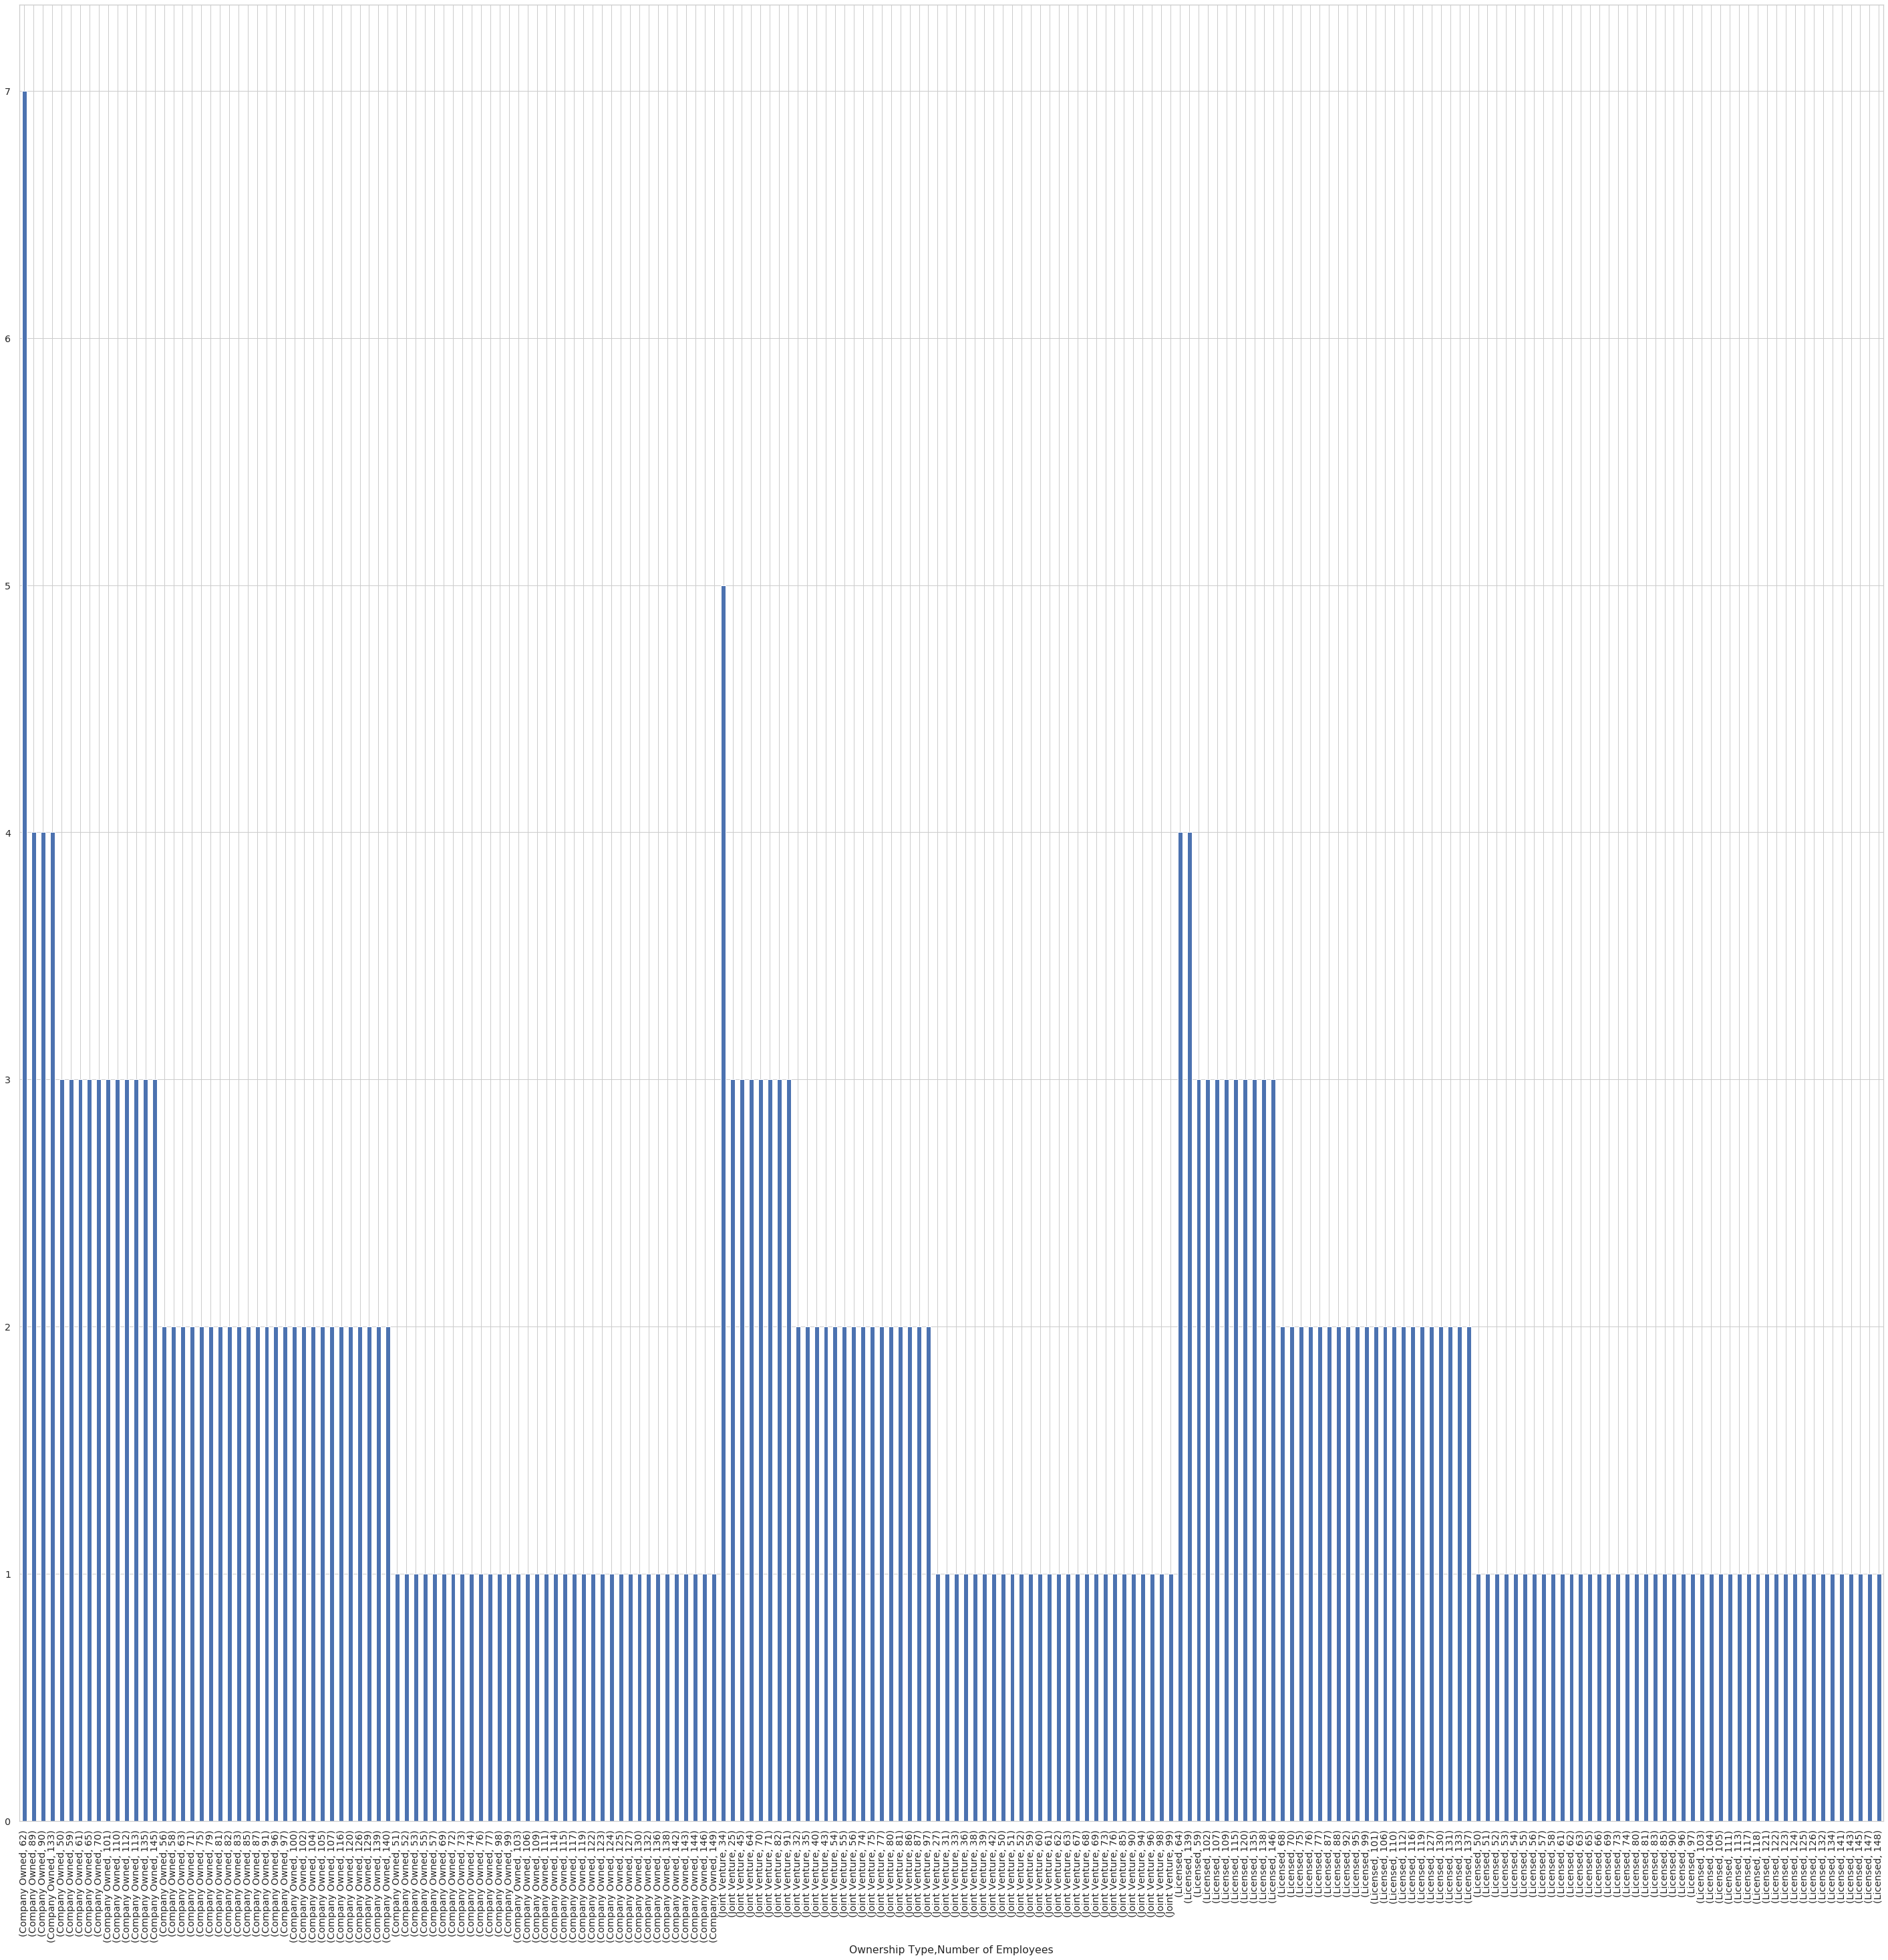

In [128]:
df_merge.groupby(["Ownership Type"])["Number of Employees"].value_counts().plot.bar(figsize=(50,50))

In [129]:
df_merge.head()

,Store ID,Store Name,Ownership Type,Street Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium,Grilled,Crispy
0,23149-228271,Banjara Hills,Joint Venture,"Lower Ground Floor, GVK One, Road Number 1, Banjara Hills",Hyderabad,AP,IN,78.45,17.42,2.117,0.172,1.655,0.907,0.748,34,3979,Egg & Cheese Muﬃn,Breakfast,112,290,14,13.0,7.0,0.2,244,28,2,2,620,False,False
1,23191-228548,Kukatpally,Joint Venture,"Upper Ground Floor, Forum Sujana Mall, Kukatpally",Hyderabad,AP,IN,78.39,17.48,1.059,0.055,0.896,0.454,0.442,25,1156,Sausage McMuﬀm,Breakfast,112,273,16,11.0,5.7,0.2,50,28,2,2,950,False,False
2,23193-228546,Madhapur,Joint Venture,"Lower Ground Floor, Inorbit Mall, Madhapur",Hyderabad,AP,IN,78.39,17.43,4.505,0.664,2.864,1.931,0.934,54,10346,Sausage & Egg McMuﬀm,Breakfast,157,355,22,17.0,7.9,0.2,277,29,2,2,1020,False,False
3,23180-228545,Jubilee Hills,Joint Venture,"Ground Floor, Road No. 92, Near Apollo hospital, Jubilee Hills",Hyderabad,AP,IN,78.42,17.42,3.406,0.398,2.394,1.460,0.935,45,7414,Veg McMuﬀm,Breakfast,119,299,10,12.0,7.2,0.2,21,38,3,3,1000,False,False
4,24457-238129,Hi-Tech City,Joint Venture,"Upper Ground Floor, Phoenix tower A, Opposite Trident Hotel, Madhapur Village",Hyderabad,AP,IN,78.38,17.45,7.333,1.657,3.395,3.143,0.252,77,17887,Veg Supreme Muﬃn,Breakfast,139,299,7,13.0,5.2,0.2,11,39,4,4,960,False,False


In [130]:
df_merge[(df_merge["Country"]=="IN")]

,Store ID,Store Name,Ownership Type,Street Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling Price,Cost Price,Gross Profit Margin,Number of Employees,Customers,Best Selling Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium,Grilled,Crispy
0,23149-228271,Banjara Hills,Joint Venture,"Lower Ground Floor, GVK One, Road Number 1, Banjara Hills",Hyderabad,AP,IN,78.45,17.42,2.117,0.172,1.655,0.907,0.748,34,3979,Egg & Cheese Muﬃn,Breakfast,112,290,14,13.0,7.0,0.2,244,28,2,2,620,False,False
1,23191-228548,Kukatpally,Joint Venture,"Upper Ground Floor, Forum Sujana Mall, Kukatpally",Hyderabad,AP,IN,78.39,17.48,1.059,0.055,0.896,0.454,0.442,25,1156,Sausage McMuﬀm,Breakfast,112,273,16,11.0,5.7,0.2,50,28,2,2,950,False,False
2,23193-228546,Madhapur,Joint Venture,"Lower Ground Floor, Inorbit Mall, Madhapur",Hyderabad,AP,IN,78.39,17.43,4.505,0.664,2.864,1.931,0.934,54,10346,Sausage & Egg McMuﬀm,Breakfast,157,355,22,17.0,7.9,0.2,277,29,2,2,1020,False,False
3,23180-228545,Jubilee Hills,Joint Venture,"Ground Floor, Road No. 92, Near Apollo hospital, Jubilee Hills",Hyderabad,AP,IN,78.42,17.42,3.406,0.398,2.394,1.460,0.935,45,7414,Veg McMuﬀm,Breakfast,119,299,10,12.0,7.2,0.2,21,38,3,3,1000,False,False
4,24457-238129,Hi-Tech City,Joint Venture,"Upper Ground Floor, Phoenix tower A, Opposite Trident Hotel, Madhapur Village",Hyderabad,AP,IN,78.38,17.45,7.333,1.657,3.395,3.143,0.252,77,17887,Veg Supreme Muﬃn,Breakfast,139,299,7,13.0,5.2,0.2,11,39,4,4,960,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,25647-242045,Royapettah,Joint Venture,"Ground Floor, Express Avenue Mall, Whites Road, Royapettah",Chennai,TN,IN,80.26,13.06,3.265,0.369,2.324,1.399,0.924,43,7041,Masala Veg,New Products,141,358,9,16.0,4.9,0.1,1,45,6,4,920,False,False
78,25269-240401,Anna Nagar,Joint Venture,"TBR tower, Y block, 2nd Avenue, Near Ayyappa Temple, Anna Nagar",Chennai,TN,IN,80.21,13.09,2.425,0.217,1.850,1.039,0.811,36,4800,Masala Non Veg,New Products,133,339,14,16.0,4.1,0.1,26,36,5,3,740,False,False
79,23145-228267,Velachery,Joint Venture,"Upper Ground Floor, Phoenix marketcity, Velachery Main Road",Chennai,TN,IN,80.22,12.99,8.461,2.177,3.334,3.626,-0.292,87,20896,Saucy Aloo Wrap,New Products,132,357,5,20.0,7.7,0.2,9,39,3,3,820,False,False
80,27719-248626,Alwarpet,Joint Venture,"Ground Floor, MGN Splendor, Off Chamiers Road, Alwarpet",Chennai,TN,IN,80.25,13.03,7.895,1.907,3.384,3.384,0.000,82,19387,Saucy Chicken Wrap,New Products,121,308,10,19.0,6.5,0.2,34,25,2,2,640,False,False


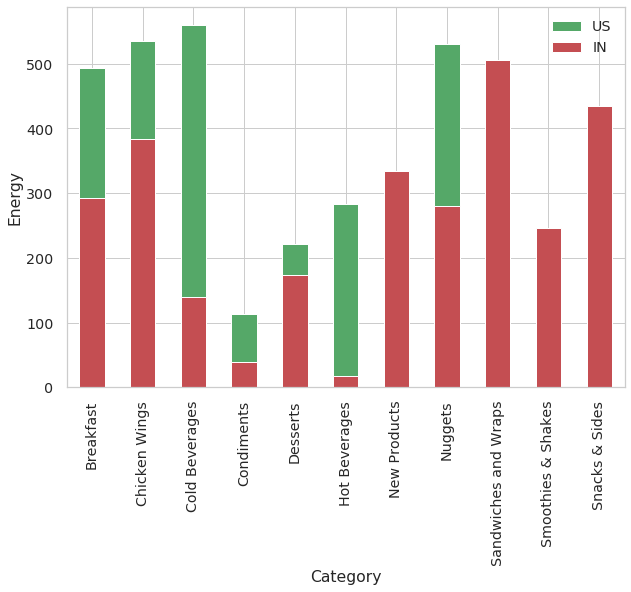

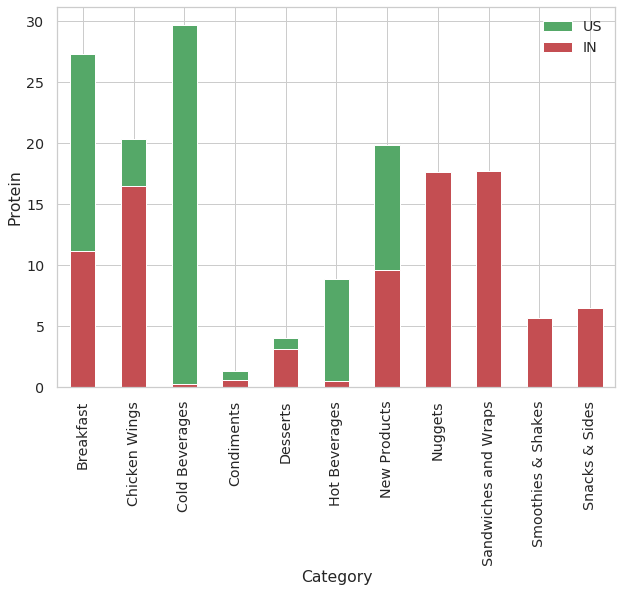

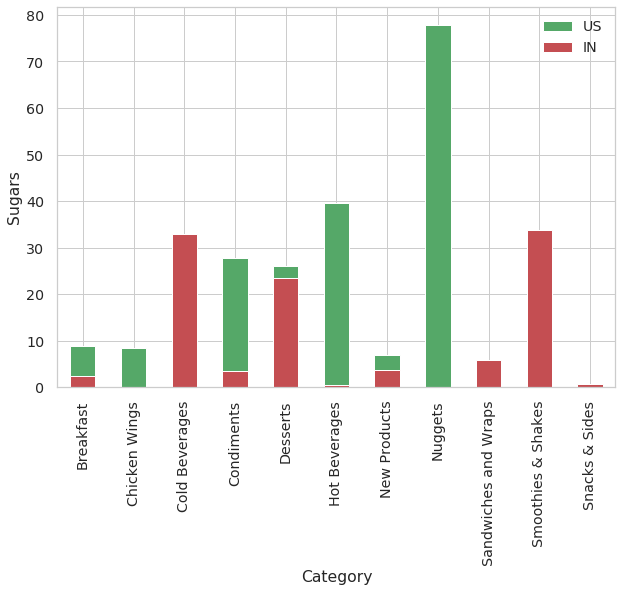

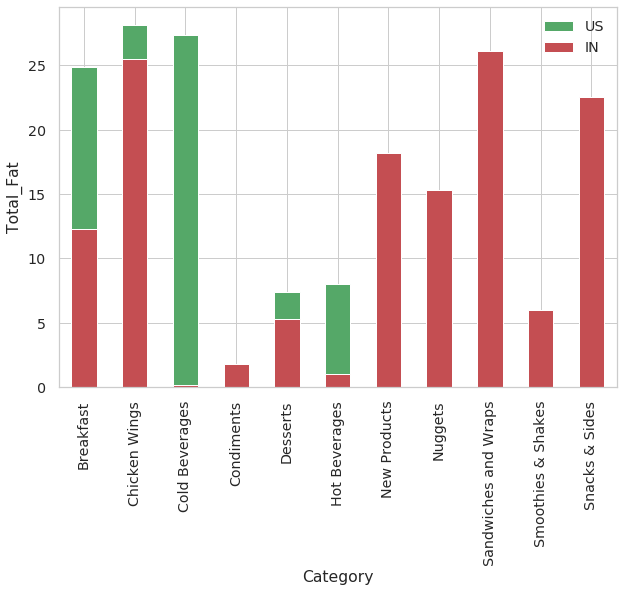

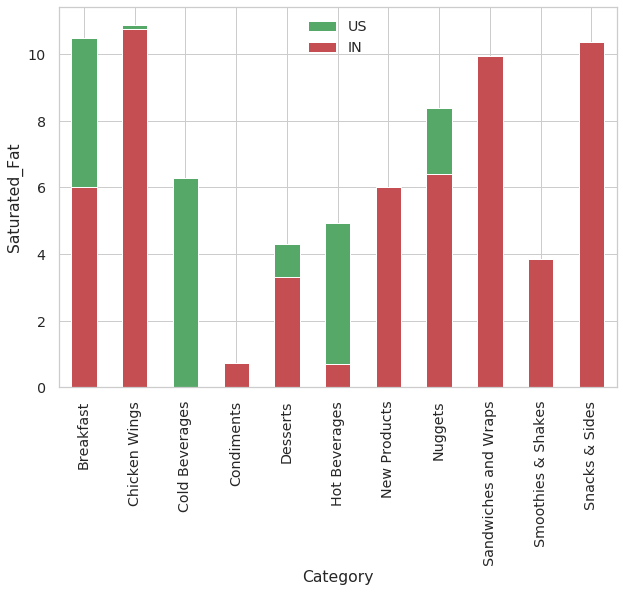

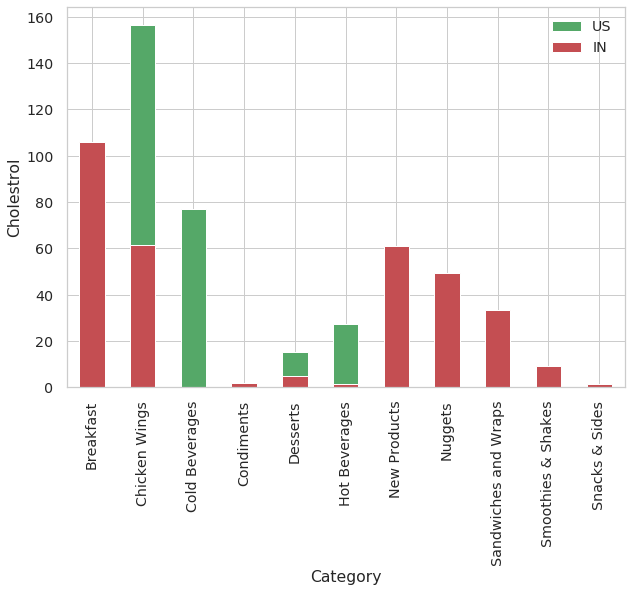

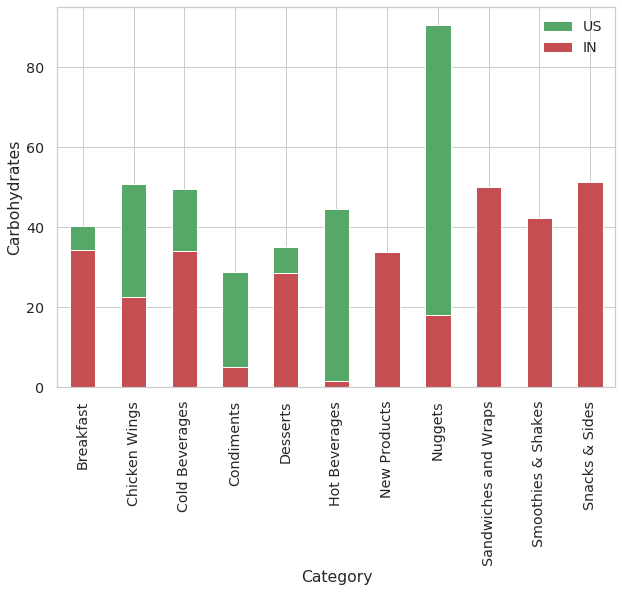

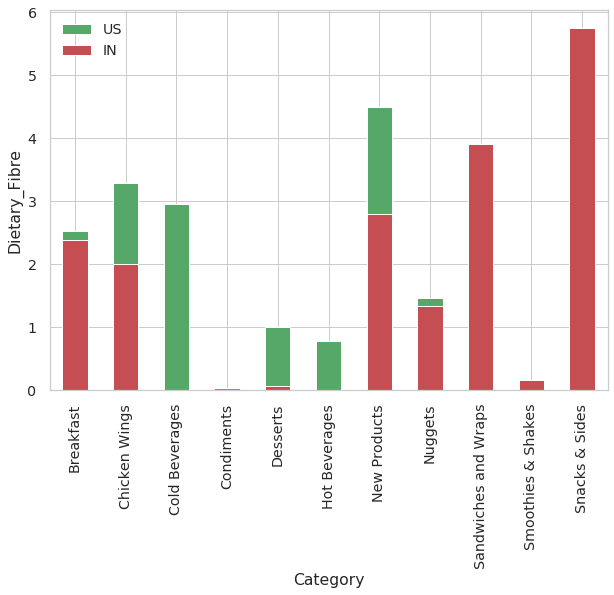

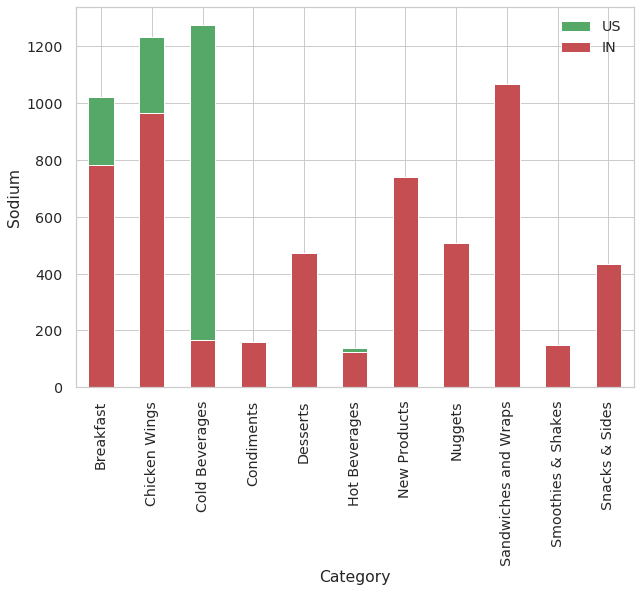

In [135]:
nutritional_info = ['Energy', 'Protein', 'Sugars', 'Total_Fat', 'Saturated_Fat', 'Cholestrol', 'Carbohydrates', 
                    'Dietary_Fibre', 'Sodium']
for value in nutritional_info:
  plt.figure(figsize=(10,7))
  df_merge[df_merge["Country"]=="US"].groupby(["Category"])[value].mean().plot.bar(color="g")
  df_merge[df_merge["Country"]=="IN"].groupby(["Category"])[value].mean().plot.bar(color="r")
  plt.ylabel(value)
  plt.legend(["US","IN"])

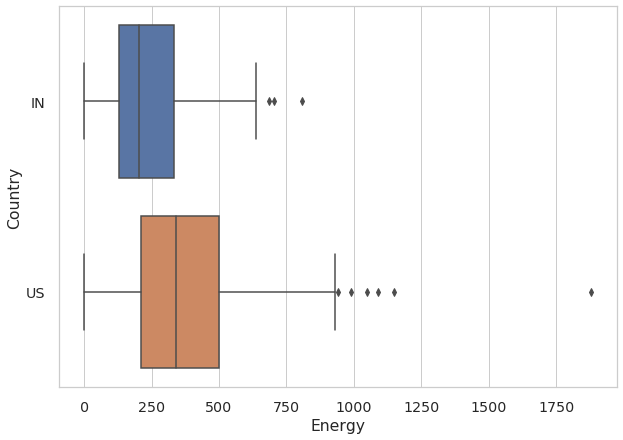

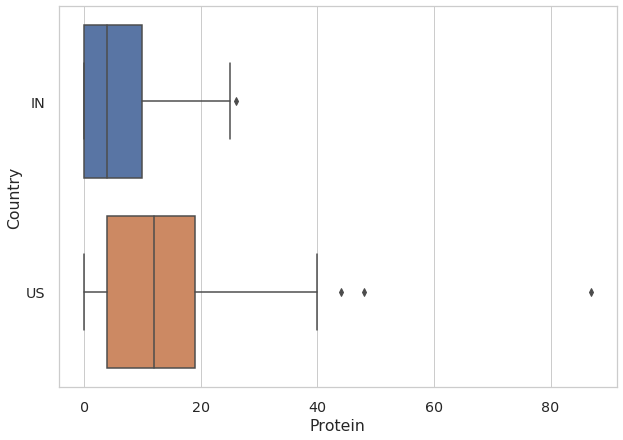

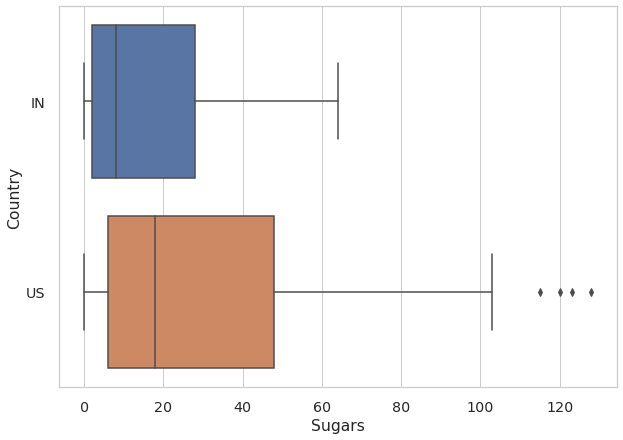

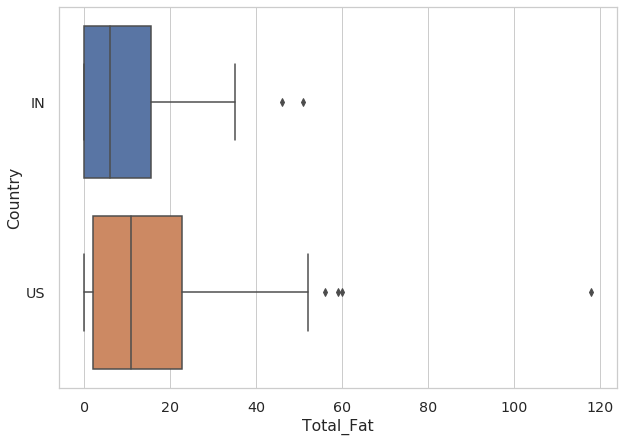

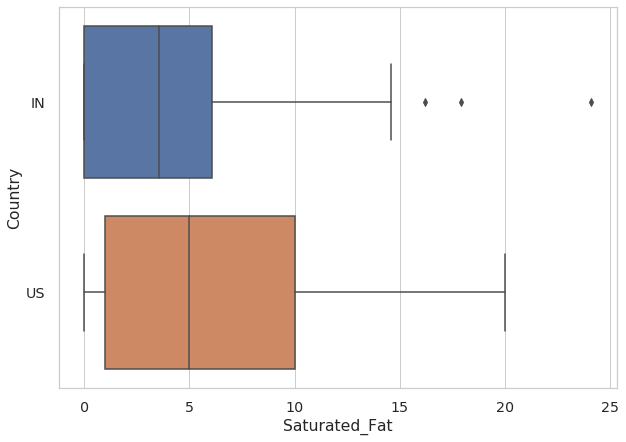

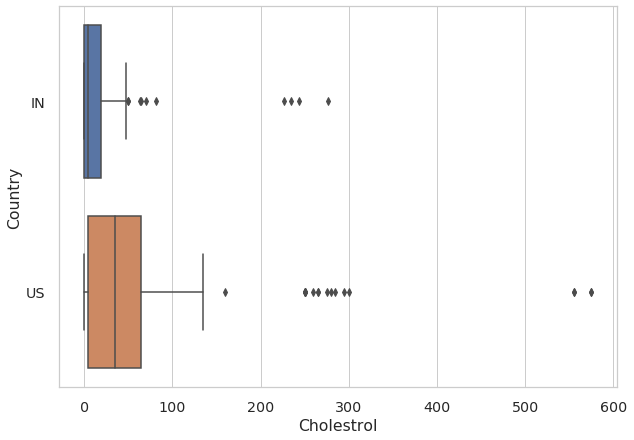

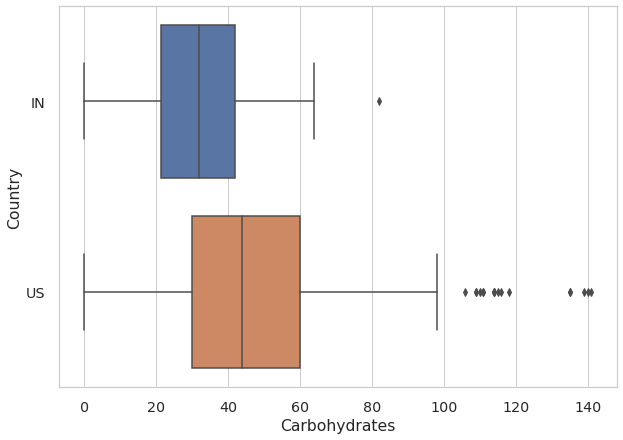

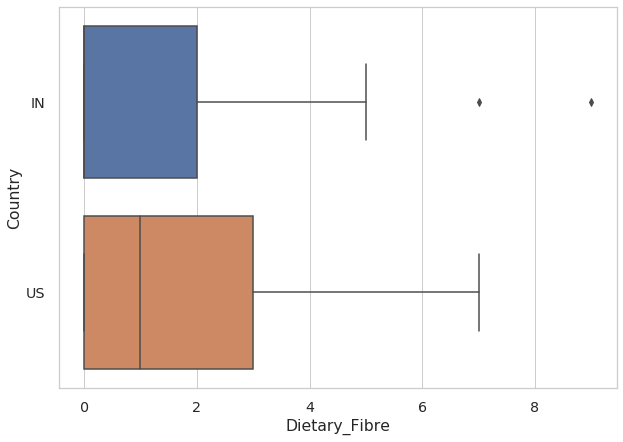

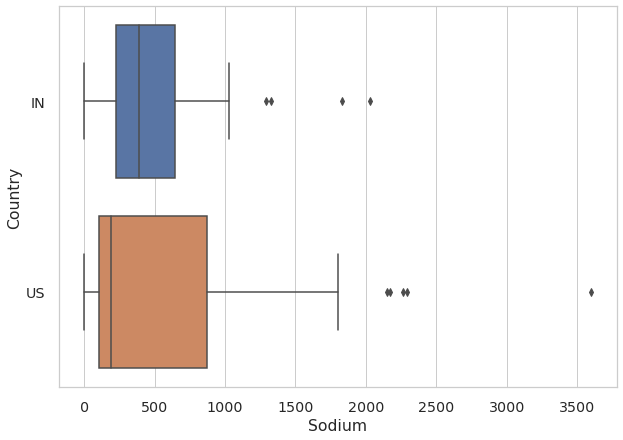

In [136]:
for value in nutritional_info:
  plt.figure(figsize=(10,7))
  sns.boxplot(data=df_merge,x=value,y="Country")

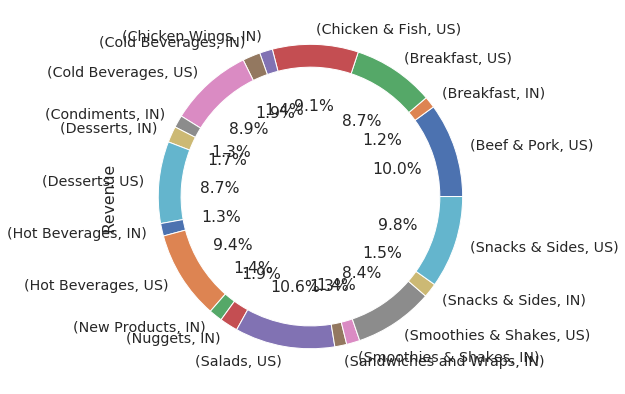

In [139]:
df_merge.groupby(["Category","Country"])["Revenue"].mean().plot.pie(figsize=(15,7),autopct="%3.1f%%",wedgeprops=dict(width=0.15))

We could infer the following from pie chart above:

Maximum revenue generation for McDonald's is from US as compared to India.
The reason behind this could be the fact that McDonald's have to enter into Joint-Ventures in India.

Also the menu in India is not that diverse and only a limited number of items are sold in India when compared to the menu in the US.

The number of outlets in India is lower as well when compared to the US.

Conclusion
It is analyzed that the items in menu dataset can be categorized as nutritious food and non-nutritious food based on different chart diagrams and range values in percentage obtained.
So it is beneficial for demonstrating different range values for food nutrients such as Protein, Sugar, Dietary Fibers, Fats, Carbohydrates, Cholesterol, and Sodium for their proper consumption from menu items.
The US food industry has risen as a high-development and high-benefit area because of its huge potential for esteem expansion, especially inside the food processing industry.
However, India is still taking its initial steps and this could be the reason for McDonald's India not being profitable after many years of operations.

Actionable Insights
In order to increase the outlet metrics like Revenue, Profits in Indian outlets, McDonald's need to open new outlets belonging to the Company Owned and Licensed ownership types instead of Joint Ventures.
The nutritional content of the food items can be improved if good agricultural practices are taken up in India like use of Genetically Modified Crops (GM Crops), High-Yield-Variety (HYV) seeds, etc.
McDonald's India needs to introduce more food items on the menu, which have higher nutritional content like US and will eventually help them increase their revenue and profits.